### Aprendizaje Automático y Análisis de Técnicas Avanzadas

Objetivo: El objetivo de esta tarea es que los estudiantes comprendan y apliquen conceptos teóricos de aprendizaje automático mediante diferentes técnicas de conjunto: Bagging, Boosting (CatBoost), Clasificador de Apilamiento y Clasificador de Votación (votación dura/suave). Además, realizarán un análisis detallado de la importancia de las características mediante Bosque Aleatorio, balanceo de datos con SMOTE y experimentos de reducción de dimensionalidad mediante PCA. Los modelos se evaluarán utilizando múltiples métricas y los resultados se compararán con un único clasificador para verificar las mejoras en el rendimiento.

#### Selección de conjunto de datos 

In [1]:
ruta= (r'C:\Users\Dc\Documents\Maestría_Data_Science\Aprendizaje_Machine_Learning\Datasets\Clientes_Telecomunicaciones.csv')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar el dataset
df = pd.read_csv(ruta, sep=',', encoding='latin1')

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Descripción de características (variables, tipos de datos).

### Análisis Variables

#### Detalle

| Término en inglés       | Español                            | Descripción |
|-------------------------|------------------------------------|-------------|
| `customerID`            | ID del cliente                     | Identificador único del cliente |
| `gender`                | género                             | Indica si el cliente es hombre o mujer |
| `SeniorCitizen`         | adulto mayor                       | Indica si el cliente es adulto mayor (1) o no (0) |
| `Partner`               | pareja                             | Indica si el cliente tiene pareja (Sí, No) |
| `Dependents`            | dependientes                       | Indica si el cliente tiene personas dependientes (Sí, No) |
| `tenure`                | permanencia                        | Número de meses que el cliente ha permanecido con la compañía |
| `PhoneService`          | servicio telefónico                | Indica si el cliente tiene servicio telefónico (Sí, No) |
| `MultipleLines`         | múltiples líneas                   | Indica si el cliente tiene múltiples líneas (Sí, No, Sin servicio telefónico) |
| `InternetService`       | servicio de internet               | Proveedor de servicio de internet (DSL, Fibra óptica, No) |
| `OnlineSecurity`        | seguridad en línea                 | Indica si el cliente tiene seguridad en línea (Sí, No, Sin internet) |
| `OnlineBackup`          | copia de seguridad en línea        | Indica si el cliente tiene backup en línea (Sí, No, Sin internet) |
| `DeviceProtection`      | protección de dispositivo          | Indica si el cliente tiene protección de dispositivos (Sí, No, Sin internet) |
| `TechSupport`           | soporte técnico                    | Indica si el cliente tiene soporte técnico (Sí, No, Sin internet) |
| `StreamingTV`           | TV en streaming                    | Indica si el cliente tiene TV en streaming (Sí, No, Sin internet) |
| `StreamingMovies`       | películas en streaming             | Indica si el cliente tiene películas en streaming (Sí, No, Sin internet) |
| `Contract`              | contrato                           | Término del contrato (Mes a mes, Un año, Dos años) |
| `PaperlessBilling`      | facturación sin papel              | Indica si el cliente tiene facturación electrónica (Sí, No) |
| `PaymentMethod`         | método de pago                     | Método de pago (Cheque electrónico, Cheque postal, Transferencia automática, Tarjeta automática) |
| `MonthlyCharges`        | cargos mensuales                   | Cantidad cobrada mensualmente |
| `TotalCharges`          | cargos totales                     | Cantidad total cobrada |
| `Churn`                 | abandono                           | Indica si el cliente abandonó el servicio (Sí/No) |


In [3]:
# Tipos de Datos
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [4]:
# Información del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Estadísticas descriptivas
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [6]:
# Verificar valores nulos
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# Verificar valores únicos en cada columna
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
# Verificar la cantidad de filas y columnas
print(df.shape)

(7043, 21)


In [9]:
# Verificar los nombres de las columnas
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


#### Convertir variable TotalCharges de Object a Float 

In [10]:
if 'df' in locals():
	df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
else:
	print("El DataFrame 'df' no está definido. Ejecute primero la celda donde se carga el DataFrame.")

#### Análisis despues del ajuste

In [11]:
# Información del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Imputamos los valores nulos en Total Charges

In [12]:
# Imputar con la mediana (menos sensible a outliers)
median_value = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_value)

In [13]:
# Información del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2281.916928,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.270398,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


# Visualización de la Distribución de Características y Variable Objetivo (Churn)

## 1. Configuración Inicial


In [15]:
# Visualización de la distribución de 'TotalCharges'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Distribución de la Variable Objetivo (Churn)


C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\4005161981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette="Set2")


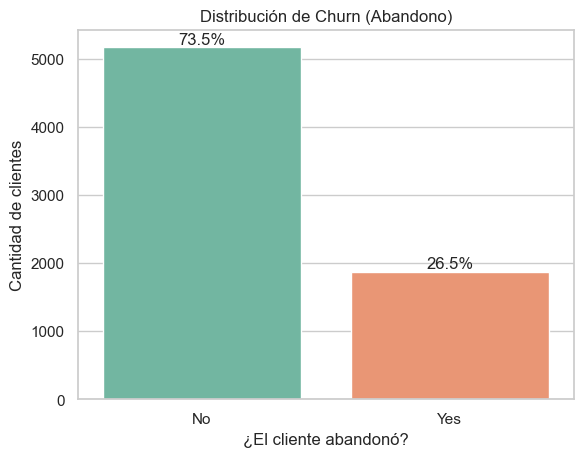

In [16]:
# Gráfico de barras del churn
ax = sns.countplot(x='Churn', data=df, palette="Set2")
plt.title('Distribución de Churn (Abandono)')
plt.xlabel('¿El cliente abandonó?')
plt.ylabel('Cantidad de clientes')

# Añadir porcentajes
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

#### Distribución Características Numéricas

Tenure (Meses de Permanencia)

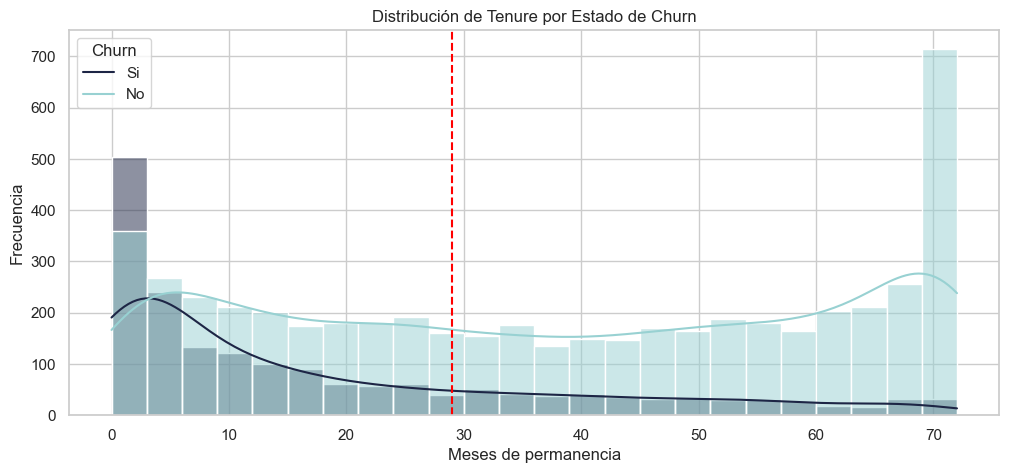

In [17]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=24, kde=True, 
             palette="ch:rot=-.25,hue=1,light=.75")
plt.title('Distribución de Tenure por Estado de Churn')
plt.xlabel('Meses de permanencia')
plt.ylabel('Frecuencia')
plt.axvline(df['tenure'].median(), color='red', linestyle='--', label='Mediana')
plt.legend(title='Churn', labels=['Si', 'No'])  # Asumiendo que el orden es No, Sí
plt.show()

<Figure size 1500x1000 with 0 Axes>

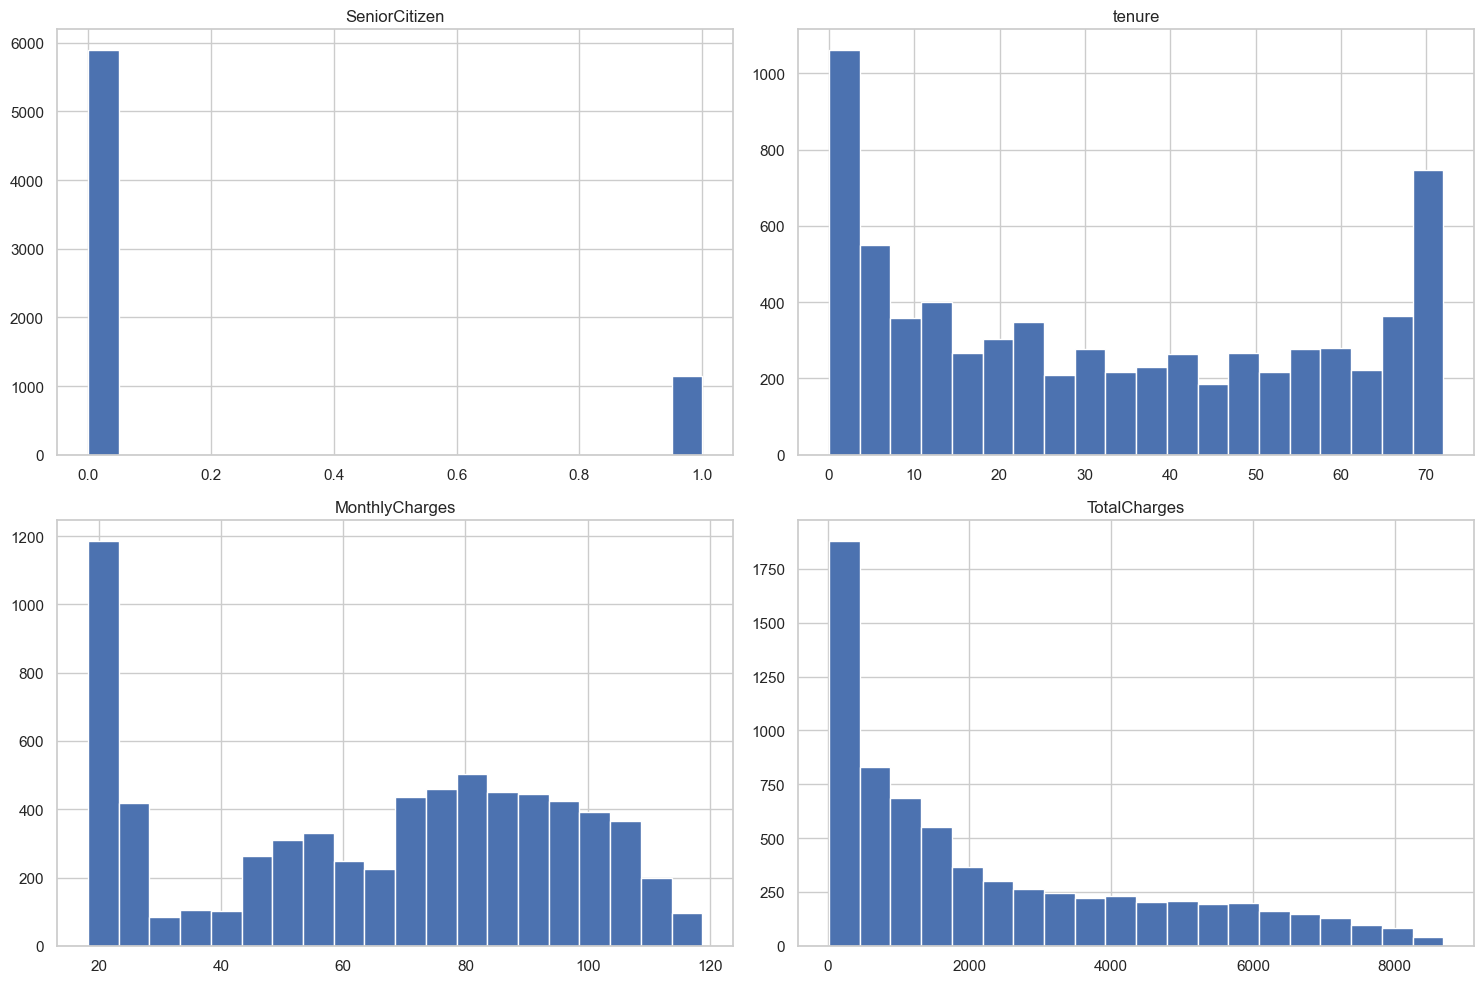

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial
plt.figure(figsize=(15, 10))

# Graficar histogramas para todas las columnas numéricas
df.select_dtypes(include=['int64', 'float64']).hist(bins=20, figsize=(15, 10))
plt.tight_layout()  # Ajusta el espaciado
plt.show()

In [19]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# Quitar columna ID si existe
if 'customerID' in cat_cols:
    cat_cols.remove('customerID')

for col in cat_cols:
    unique_vals = df[col].unique()
    value_counts = df[col].value_counts()
    
    print(f"\n🏷️  {col.upper()} ({len(unique_vals)} unique values)")
    print("=" * 50)
    
    for val in unique_vals:
        count = value_counts[val]
        percentage = (count / len(df)) * 100
        print(f"  • {val:<15} → {count:>5} records ({percentage:.1f}%)")


🏷️  GENDER (2 unique values)
  • Female          →  3488 records (49.5%)
  • Male            →  3555 records (50.5%)

🏷️  PARTNER (2 unique values)
  • Yes             →  3402 records (48.3%)
  • No              →  3641 records (51.7%)

🏷️  DEPENDENTS (2 unique values)
  • No              →  4933 records (70.0%)
  • Yes             →  2110 records (30.0%)

🏷️  PHONESERVICE (2 unique values)
  • No              →   682 records (9.7%)
  • Yes             →  6361 records (90.3%)

🏷️  MULTIPLELINES (3 unique values)
  • No phone service →   682 records (9.7%)
  • No              →  3390 records (48.1%)
  • Yes             →  2971 records (42.2%)

🏷️  INTERNETSERVICE (3 unique values)
  • DSL             →  2421 records (34.4%)
  • Fiber optic     →  3096 records (44.0%)
  • No              →  1526 records (21.7%)

🏷️  ONLINESECURITY (3 unique values)
  • No              →  3498 records (49.7%)
  • Yes             →  2019 records (28.7%)
  • No internet service →  1526 records (21.7%)

🏷️ 

C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\3307318077.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax, palette=executive_colors)
C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\3307318077.py:34: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  bars = sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax, palette=executive_colors)
C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\3307318077.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax, palette=executive_colors)
C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\3

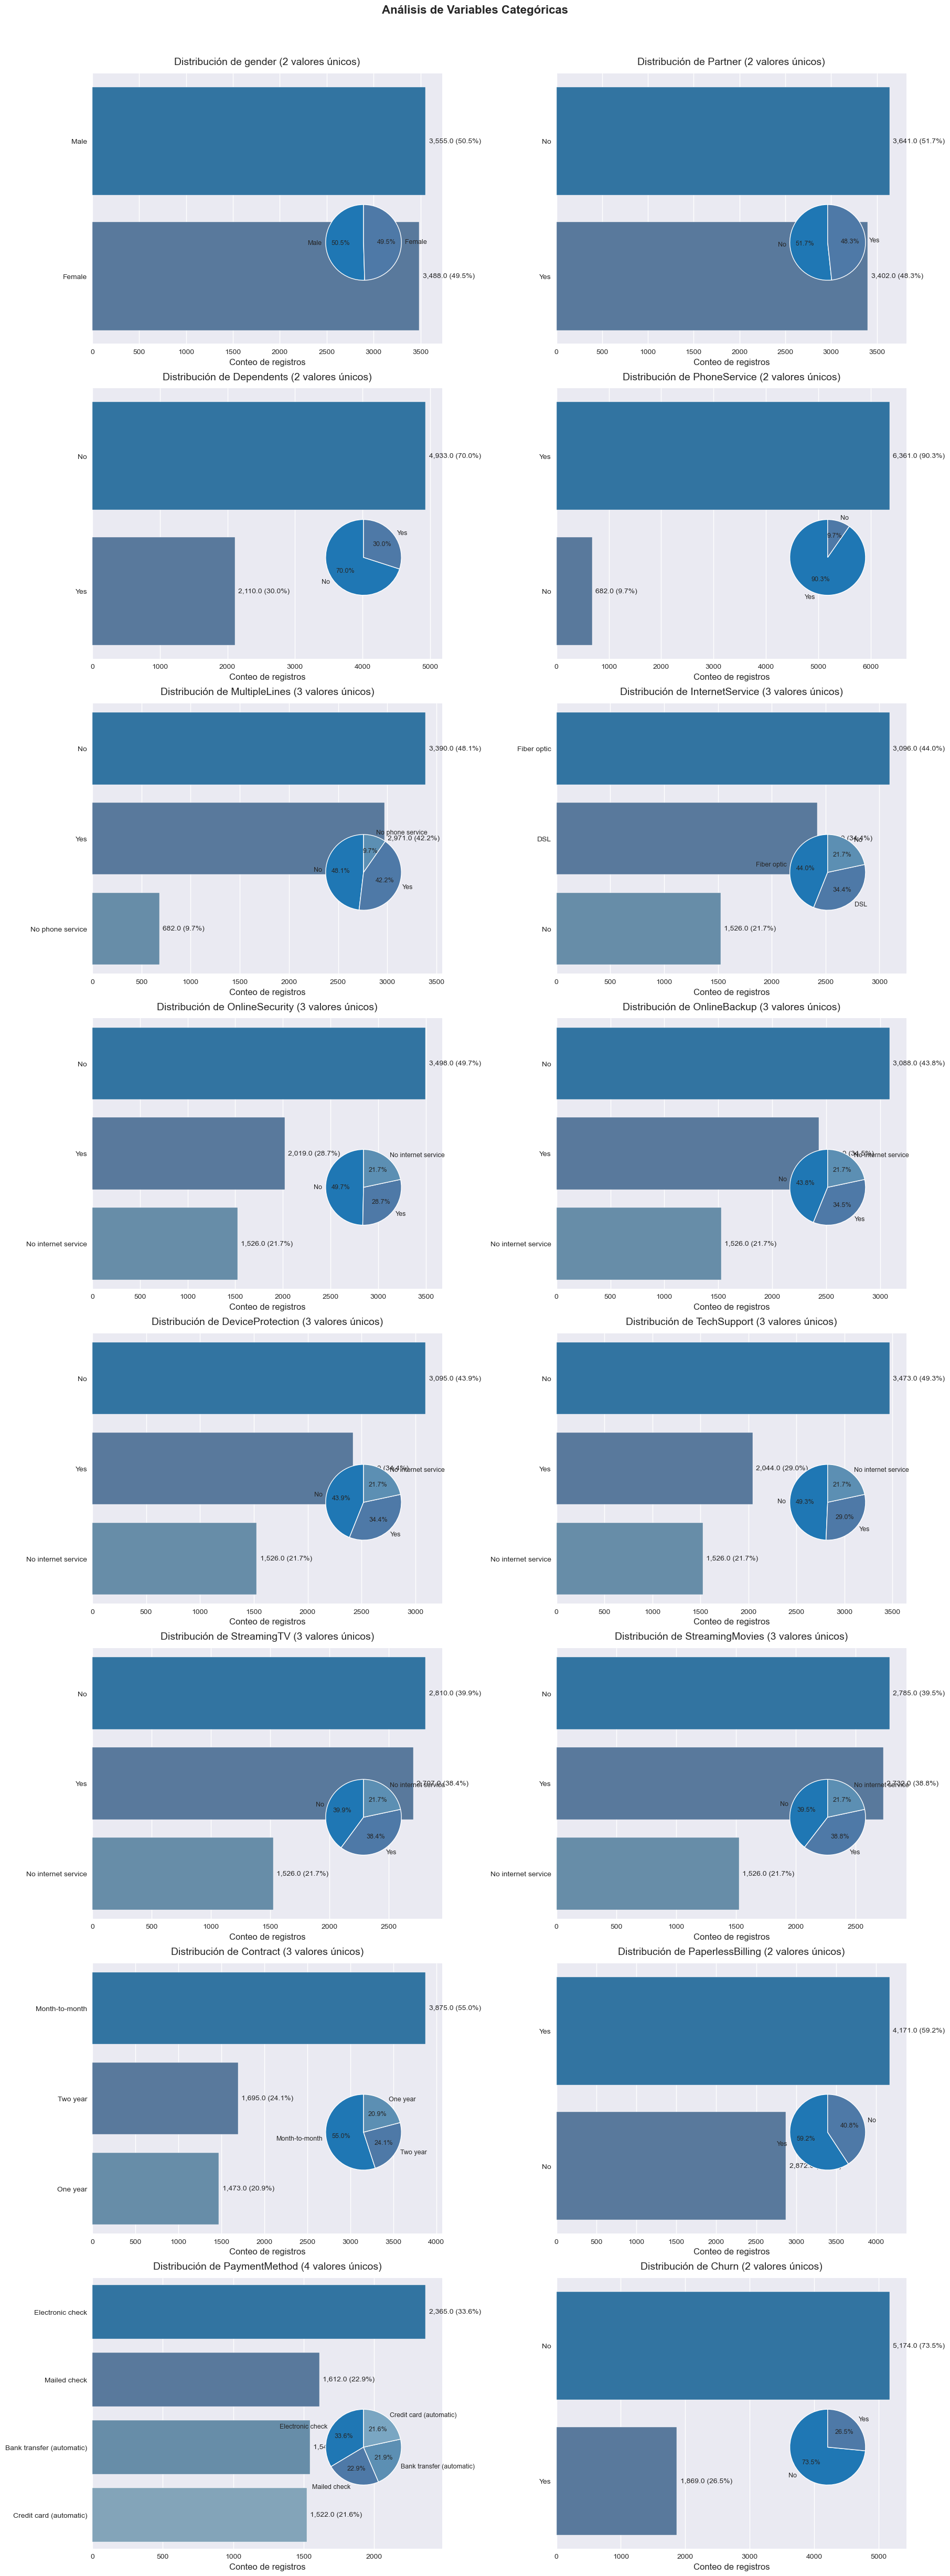


📊 RESUMEN ESTADÍSTICO DE VARIABLES CATEGÓRICAS

🏷️ GENDER (2 valores únicos)
----------------------------------------
gender
Male      3555
Female    3488

🏷️ PARTNER (2 valores únicos)
----------------------------------------
Partner
No     3641
Yes    3402

🏷️ DEPENDENTS (2 valores únicos)
----------------------------------------
Dependents
No     4933
Yes    2110

🏷️ PHONESERVICE (2 valores únicos)
----------------------------------------
PhoneService
Yes    6361
No      682

🏷️ MULTIPLELINES (3 valores únicos)
----------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682

🏷️ INTERNETSERVICE (3 valores únicos)
----------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526

🏷️ ONLINESECURITY (3 valores únicos)
----------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526

🏷️ ONLINEBACKU

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Configuración de estilo ejecutivo
plt.style.use('seaborn-v0_8')
sns.set_palette("Blues_r")  # Paleta profesional de azules
executive_colors = ["#1f77b4", "#4e79a7", "#5c8fb3", "#7aa6c2", "#a7c4d0"]  # Tonos azules profesionales

# Configuración general
plt.rcParams.update({'figure.figsize': (16, 12), 'axes.titlesize': 14, 'axes.labelsize': 12})

# Procesamiento de columnas
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Eliminar 'customerID' si está presente
if 'customerID' in cat_cols:
    cat_cols.remove('customerID')

# Calcular el diseño de la grid
n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

# Crear figura maestra
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)
axes = axes.flatten()

# Iterar sobre cada columna categórica
for ax, col in zip(axes, cat_cols):
    value_counts = df[col].value_counts()
    
    # Gráfico de barras horizontales mejorado
    bars = sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax, palette=executive_colors)
    ax.set_title(f'Distribución de {col} ({len(value_counts)} valores únicos)', pad=12)
    ax.set_xlabel('Conteo de registros')
    ax.set_ylabel('')
    
    # Añadir etiquetas de valor
    for p in bars.patches:
        ax.text(p.get_width() + 0.01 * max(value_counts), p.get_y() + p.get_height()/2.,
                f'{p.get_width():,} ({p.get_width()/len(df)*100:.1f}%)', va='center', fontsize=10)
    
    # Gráfico de pie como inserción si hay ≤6 categorías
    if len(value_counts) <= 6:
        pie_ax = ax.inset_axes([0.6, 0.2, 0.35, 0.35])
        value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=executive_colors,
                              wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, textprops={'fontsize': 9}, ax=pie_ax)
        pie_ax.set_ylabel('')

# Ajustar layout y título
plt.suptitle('Análisis de Variables Categóricas', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Mostrar resumen estadístico en consola
print("\n📊 RESUMEN ESTADÍSTICO DE VARIABLES CATEGÓRICAS")
print("="*60)
for col in cat_cols:
    print(f"\n🏷️ {col.upper()} ({df[col].nunique()} valores únicos)")
    print("-"*40)
    print(df[col].value_counts().to_string())


#### Matriz de Correlación

C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\858114973.py:56: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Dc\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


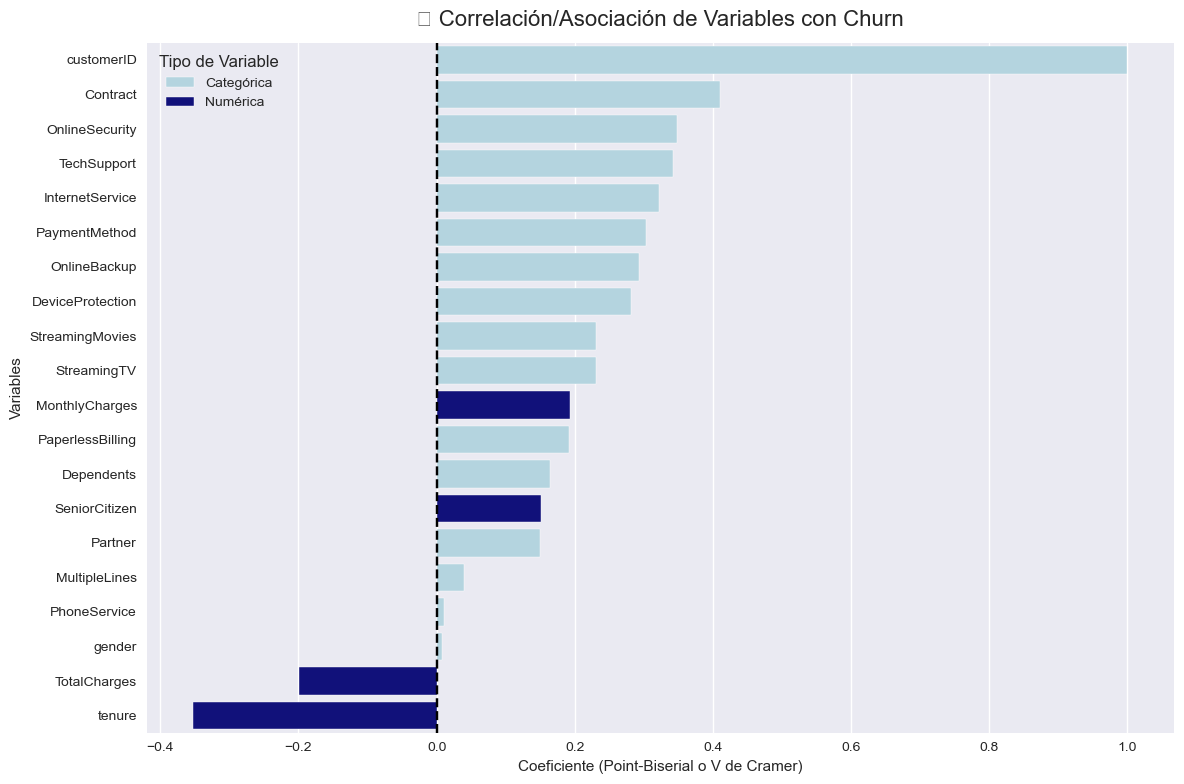


🔍 RESUMEN DE CORRELACIONES/ASOCIACIONES CON CHURN
        Variable  Correlación/Asociación       Tipo
      customerID                1.000000 Categórica
        Contract                0.410116 Categórica
  OnlineSecurity                0.347400 Categórica
     TechSupport                0.342916 Categórica
 InternetService                0.322455 Categórica
   PaymentMethod                0.303359 Categórica
    OnlineBackup                0.292316 Categórica
DeviceProtection                0.281580 Categórica
 StreamingMovies                0.230951 Categórica
     StreamingTV                0.230502 Categórica
  MonthlyCharges                0.193356   Numérica
PaperlessBilling                0.191498 Categórica
      Dependents                0.163870 Categórica
   SeniorCitizen                0.150889   Numérica
         Partner                0.150126 Categórica
   MultipleLines                0.040109 Categórica
    PhoneService                0.011398 Categórica
          gen

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, chi2_contingency

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("Blues_r")

# 1. Convertir 'Churn' a numérico si es necesario
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. Separar variables numéricas y categóricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. Calcular correlación para variables NUMÉRICAS (Point-Biserial)
num_correlations = {}
for col in num_cols:
    if col != 'Churn':
        corr, _ = pointbiserialr(df[col], df['Churn'])
        num_correlations[col] = corr

# 4. Calcular asociación para variables CATEGÓRICAS (V de Cramer)
cat_associations = {}
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    v_cramer = np.sqrt(phi2 / min(contingency_table.shape[0]-1, contingency_table.shape[1]-1))
    cat_associations[col] = v_cramer

# 5. Combinar resultados en un DataFrame
corr_df = pd.DataFrame({
    'Variable': list(num_correlations.keys()) + list(cat_associations.keys()),
    'Correlación/Asociación': list(num_correlations.values()) + list(cat_associations.values()),
    'Tipo': ['Numérica'] * len(num_correlations) + ['Categórica'] * len(cat_associations)
}).sort_values(by='Correlación/Asociación', ascending=False)

# 6. Graficar (usando colores distintos para numéricas y categóricas)
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Correlación/Asociación', 
    y='Variable', 
    hue='Tipo',
    data=corr_df,
    palette={'Numérica': 'darkblue', 'Categórica': 'lightblue'}
)
plt.title("📊 Correlación/Asociación de Variables con Churn", fontsize=16, pad=12)
plt.xlabel("Coeficiente (Point-Biserial o V de Cramer)")
plt.ylabel("Variables")
plt.axvline(0, color='black', linestyle='--')
plt.legend(title='Tipo de Variable')
plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n🔍 RESUMEN DE CORRELACIONES/ASOCIACIONES CON CHURN")
print("=" * 60)
print(corr_df.to_string(index=False))

C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\1371814543.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlación', y='Variable', data=corr_df, palette="Blues_r")


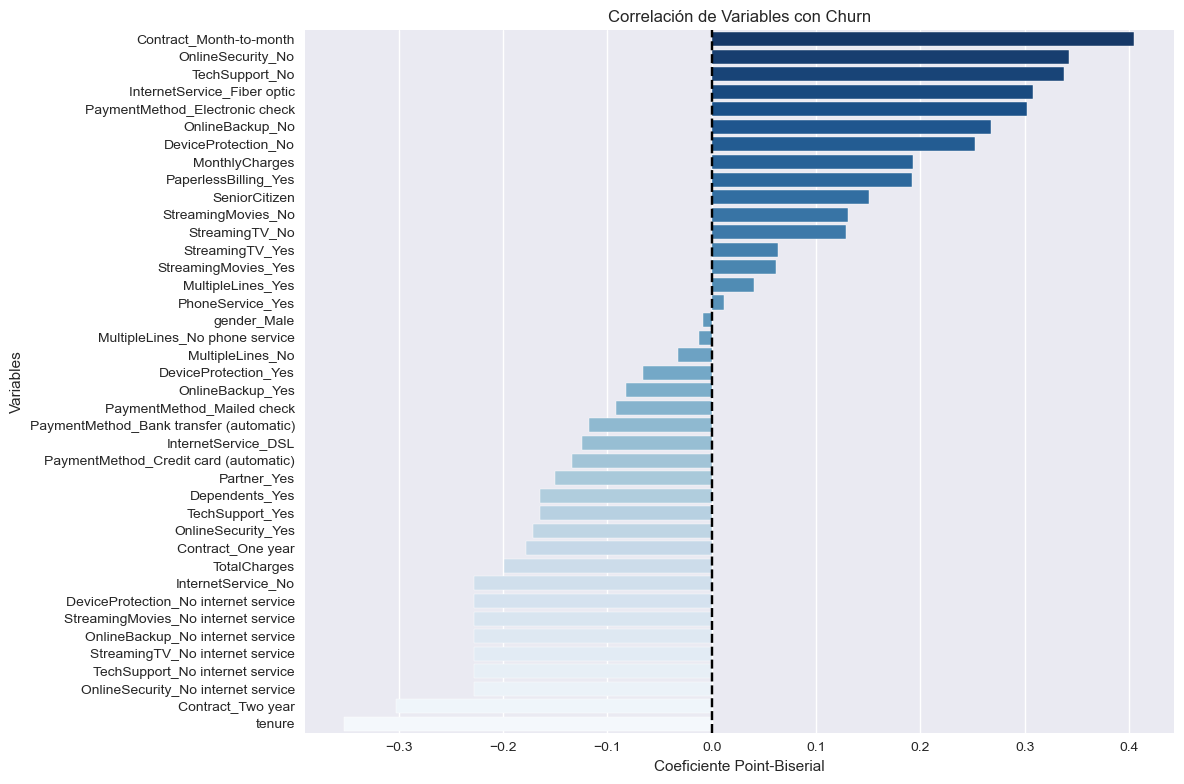


Resumen de correlaciones con Churn
                               Variable  Correlación
                Contract_Month-to-month     0.405103
                      OnlineSecurity_No     0.342637
                         TechSupport_No     0.337281
            InternetService_Fiber optic     0.308020
         PaymentMethod_Electronic check     0.301919
                        OnlineBackup_No     0.268005
                    DeviceProtection_No     0.252481
                         MonthlyCharges     0.193356
                   PaperlessBilling_Yes     0.191825
                          SeniorCitizen     0.150889
                     StreamingMovies_No     0.130845
                         StreamingTV_No     0.128916
                        StreamingTV_Yes     0.063228
                    StreamingMovies_Yes     0.061382
                      MultipleLines_Yes     0.040102
                       PhoneService_Yes     0.011942
                            gender_Male    -0.008612
         M

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pointbiserialr
from sklearn.preprocessing import OneHotEncoder

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("Blues_r")

# Convertir la variable objetivo a formato numérico si es necesario
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Identificar variables numéricas y categóricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluir 'customerID' de las variables categóricas
if 'customerID' in cat_cols:
    cat_cols.remove('customerID')

# Aplicar One-Hot Encoding a las variables categóricas (sin customerID)
encoder = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False)
encoded_cat = encoder.fit_transform(df[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols), index=df.index)

# Combinar los datos transformados con las variables numéricas (excluyendo 'Churn' de las features)
feature_num_cols = [col for col in num_cols if col != 'Churn']
df_encoded = pd.concat([df[feature_num_cols], encoded_cat_df], axis=1)

# Calcular la correlación entre cada variable y la variable objetivo
correlations = {}
for col in df_encoded.columns:
    try:
        corr, _ = pointbiserialr(df_encoded[col], df['Churn'])
        correlations[col] = corr
    except Exception as e:
        correlations[col] = np.nan  # Si hay error, asigna NaN

# Crear un DataFrame con los resultados
corr_df = pd.DataFrame({
    'Variable': list(correlations.keys()),
    'Correlación': list(correlations.values())
}).sort_values(by='Correlación', ascending=False)

# Graficar las correlaciones
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlación', y='Variable', data=corr_df, palette="Blues_r")
plt.title("Correlación de Variables con Churn")
plt.xlabel("Coeficiente Point-Biserial")
plt.ylabel("Variables")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# Mostrar los resultados en formato de tabla
print("\nResumen de correlaciones con Churn")
print("=" * 60)
print(corr_df.to_string(index=False))


#### Transformadores Pipeline

In [23]:
from sklearn.model_selection import train_test_split  # Importación necesaria
# Separar variables predictoras y variable objetivo
X = df.drop(['Churn', 'customerID'], axis=1)  # Elimina columna objetivo e ID
y = df['Churn']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Preparar datos (excluyendo 'customerID' y la variable objetivo)
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

# 2. Dividir datos (conservando proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# 3. Identificar columnas numéricas y categóricas automáticamente
num_attribs = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_attribs = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 4. Crear pipelines individuales
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# 5. Preprocesador completo 
preprocessor = ColumnTransformer([
    ('numeric', num_pipeline, num_attribs),
    ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'), cat_attribs)
], remainder='drop')

# 6. Aplicar transformaciones
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)  # Transformación consistente para test

# 7. Convertir a DataFrame con nombres de columnas
feature_names = preprocessor.get_feature_names_out()

# Para entrenamiento
X_train_prep_df = pd.DataFrame(
    X_train_prep,
    columns=feature_names,
    index=X_train.index
)

# Para test (importante usar el mismo preprocesador)
X_test_prep_df = pd.DataFrame(
    X_test_prep,
    columns=feature_names,
    index=X_test.index
)

# Resultados
print("\nDatos de entrenamiento preparados:")
print(f"Dimensiones: {X_train_prep_df.shape}")
print(X_train_prep_df.head())

print("\nDatos de prueba preparados:")
print(f"Dimensiones: {X_test_prep_df.shape}")
print(X_test_prep_df.head())


Datos de entrenamiento preparados:
Dimensiones: (5634, 40)
      numeric__SeniorCitizen  numeric__tenure  numeric__MonthlyCharges  \
3738                     0.0         0.130435                -0.391994   
3151                     0.0        -0.304348                 0.084656   
4860                     0.0        -0.347826                -0.551185   
3867                     0.0        -0.065217                 0.055210   
3810                     0.0        -0.608696                -0.477571   

      numeric__TotalCharges  categorical__gender_Male  \
3738               0.088759                       1.0   
3151              -0.071762                       1.0   
4860              -0.235521                       1.0   
3867               0.148301                       0.0   
3810              -0.394787                       1.0   

      categorical__Partner_Yes  categorical__Dependents_Yes  \
3738                       0.0                          0.0   
3151                      

In [25]:
print("Filas originales en X_train:", X_train.shape[0])
print("Filas después de la transformación:", X_train_prep_df.shape[0])


Filas originales en X_train: 5634
Filas después de la transformación: 5634


In [26]:
X_train_prep_df.head()

,numeric__SeniorCitizen,numeric__tenure,numeric__MonthlyCharges,numeric__TotalCharges,categorical__gender_Male,categorical__Partner_Yes,categorical__Dependents_Yes,categorical__PhoneService_Yes,categorical__MultipleLines_No,categorical__MultipleLines_No phone service,...,categorical__StreamingMovies_No internet service,categorical__StreamingMovies_Yes,categorical__Contract_Month-to-month,categorical__Contract_One year,categorical__Contract_Two year,categorical__PaperlessBilling_Yes,categorical__PaymentMethod_Bank transfer (automatic),categorical__PaymentMethod_Credit card (automatic),categorical__PaymentMethod_Electronic check,categorical__PaymentMethod_Mailed check
3738,0.0,0.130435,-0.391994,0.088759,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3151,0.0,-0.304348,0.084656,-0.071762,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4860,0.0,-0.347826,-0.551185,-0.235521,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3867,0.0,-0.065217,0.055210,0.148301,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3810,0.0,-0.608696,-0.477571,-0.394787,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
X_train_prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3738 to 5639
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   numeric__SeniorCitizen                                5634 non-null   float64
 1   numeric__tenure                                       5634 non-null   float64
 2   numeric__MonthlyCharges                               5634 non-null   float64
 3   numeric__TotalCharges                                 5634 non-null   float64
 4   categorical__gender_Male                              5634 non-null   float64
 5   categorical__Partner_Yes                              5634 non-null   float64
 6   categorical__Dependents_Yes                           5634 non-null   float64
 7   categorical__PhoneService_Yes                         5634 non-null   float64
 8   categorical__MultipleLines_No                         5634 n

#### Modelos de conjunto:

Bagging : Implemente un método de bagging, como Random Forest o Bagging Classifier .
Impulso : utilice CatBoost como algoritmo de impulso.
Clasificador de apilamiento : construya un clasificador de apilamiento con al menos dos modelos base y un metamodelo.
Clasificador de votación : implemente un clasificador de votación con votación dura y suave.
Por favor, para la selección de hiperparámetros utilizados, utilice una tabla

### Preparación Datos

In [28]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Preprocesar también el conjunto de prueba para evaluaciones futuras
X_test_prep = preprocessor.transform(X_test)
X_test_prep_df = pd.DataFrame(
    X_test_prep,
    columns=feature_names,
    index=X_test.index
)

#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hiperparámetros para Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Búsqueda de hiperparámetros
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                       rf_params, 
                       cv=5, 
                       scoring='accuracy',
                       n_jobs=-1)
rf_grid.fit(X_train_prep_df, y_train)

# Mejor modelo
best_rf = rf_grid.best_estimator_
rf_score = best_rf.score(X_test_prep_df, y_test)

print(f"Mejor modelo Random Forest: {best_rf}")
print(f"Precisión en el conjunto de prueba: {rf_score:.4f}")

Mejor modelo Random Forest: RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=42)
Precisión en el conjunto de prueba: 0.8077



Reporte de Clasificación:


Text(0.5, 38.72222222222221, 'Predicción')

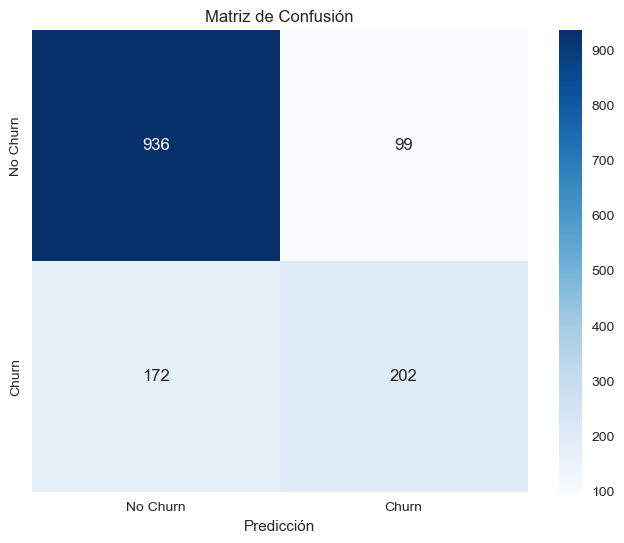

In [56]:
RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200, random_state=42)
# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix     
# Predicciones
y_pred = best_rf.predict(X_test_prep_df)
# Reporte de clasificación
print("\nReporte de Clasificación:")
reporte_random=classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')


#### Boosting: CatBoost

In [50]:
from catboost import CatBoostClassifier

# Hiperparámetros para CatBoost
catboost_params = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# Búsqueda de hiperparámetros
cb_grid = GridSearchCV(CatBoostClassifier(silent=True, random_state=42),
                       catboost_params,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
cb_grid.fit(X_train_prep_df, y_train)

# Mejor modelo
best_cb = cb_grid.best_estimator_
cb_score = best_cb.score(X_test_prep_df, y_test)

In [51]:
# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", cb_grid.best_params_)

# Precisión del mejor modelo en conjunto de prueba
print(f"Precisión en test: {cb_score:.4f}")

Mejores hiperparámetros: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Precisión en test: 0.8062



Reporte de Clasificación:


Text(0.5, 38.72222222222221, 'Predicción')

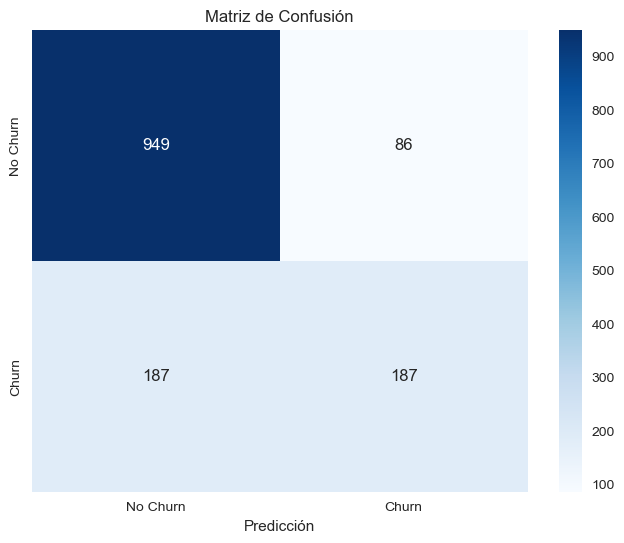

In [52]:
CatBoostClassifier(max_depth=6, iterations=200, l2_leaf_reg=3, learning_rate=0.01, random_state=42)
# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix     
# Predicciones
y_pred = best_cb.predict(X_test_prep_df)
# Reporte de clasificación
print("\nReporte de Clasificación:")
Reporte_Catboost=classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')

### Clasificador de Votación

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

# Modelos para votación
models = [
    ('rf', best_rf),
    ('catboost', best_cb),
    ('nb', GaussianNB())
]

# Votación dura
voting_hard = VotingClassifier(estimators=models, voting='hard')
voting_hard.fit(X_train_prep_df, y_train)
hard_score = voting_hard.score(X_test_prep_df, y_test)

# Votación suave
voting_soft = VotingClassifier(estimators=models, voting='soft')
voting_soft.fit(X_train_prep_df, y_train)
soft_score = voting_soft.score(X_test_prep_df, y_test)

In [35]:
# Imprimir hiperparámetros de los modelos utilizados en VotingClassifier
print("Mejores hiperparámetros del modelo Random Forest:")
print(best_rf.get_params())

print("\nMejores hiperparámetros de CatBoost:")
print(best_cb.get_params())

print("\nModelo Naive Bayes:")
print(GaussianNB().get_params())


Mejores hiperparámetros del modelo Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Mejores hiperparámetros de CatBoost:
{'silent': True, 'random_state': 42, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.01}

Modelo Naive Bayes:
{'priors': None, 'var_smoothing': 1e-09}


In [38]:
# Imprimir los mejores hiperparámetros de los modelos en VotingClassifier
print("Mejores hiperparámetros del modelo Random Forest:")
print(best_rf.get_params())

print("\nMejores hiperparámetros de CatBoost:")
print(best_cb.get_params())

from sklearn.naive_bayes import GaussianNB
best_nb = GaussianNB()

print("\nModelo Naive Bayes:")
print(best_nb.get_params())

# Imprimir las puntuaciones de cada enfoque
print(f"\nPuntuación del VotingClassifier (votación dura): {hard_score}")
print(f"Puntuación del VotingClassifier (votación suave): {soft_score}")

Mejores hiperparámetros del modelo Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Mejores hiperparámetros de CatBoost:
{'silent': True, 'random_state': 42, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.01}

Modelo Naive Bayes:
{'priors': None, 'var_smoothing': 1e-09}

Puntuación del VotingClassifier (votación dura): 0.8055358410220014
Puntuación del VotingClassifier (votación suave): 0.7473385379701917


Puntuación del VotingClassifier (votación suave): 0.7473385379701917

Reporte de Clasificación:


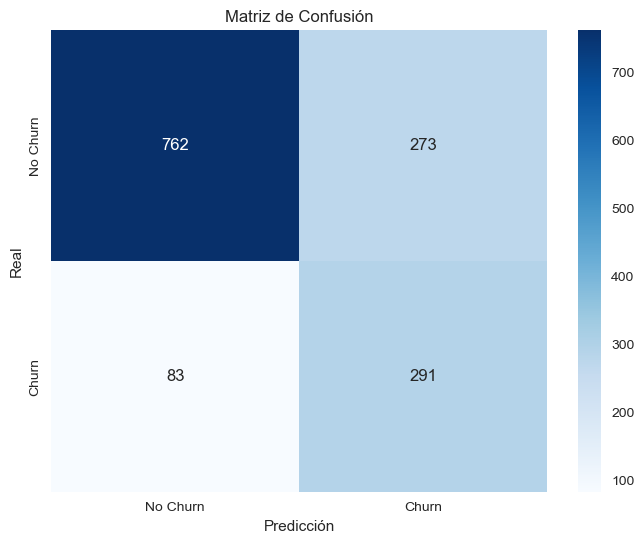

In [39]:
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir modelos con sus mejores hiperparámetros
best_rf = RandomForestClassifier(
    bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', 
    max_depth=10, max_features='sqrt', max_leaf_nodes=None, max_samples=None, 
    min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2, 
    min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=200, 
    n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False
)

best_cb = CatBoostClassifier(
    silent=True, random_state=42, depth=6, iterations=200, 
    l2_leaf_reg=3, learning_rate=0.01
)

best_nb = GaussianNB(
    priors=None, var_smoothing=1e-09
)

# Voting Classifier (votación suave)
models = [('rf', best_rf), ('catboost', best_cb), ('nb', best_nb)]
voting_soft = VotingClassifier(estimators=models, voting='soft')
voting_soft.fit(X_train_prep_df, y_train)

# Evaluación del modelo
soft_score = voting_soft.score(X_test_prep_df, y_test)
print(f"Puntuación del VotingClassifier (votación suave): {soft_score}")

# Predicciones con el VotingClassifier
y_pred = voting_soft.predict(X_test_prep_df)

# Reporte de clasificación
print("\nReporte de Clasificación:")
Reporte_Voting_suave=classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


Puntuación del VotingClassifier (votación dura): 0.8055358410220014

Reporte de Clasificación:


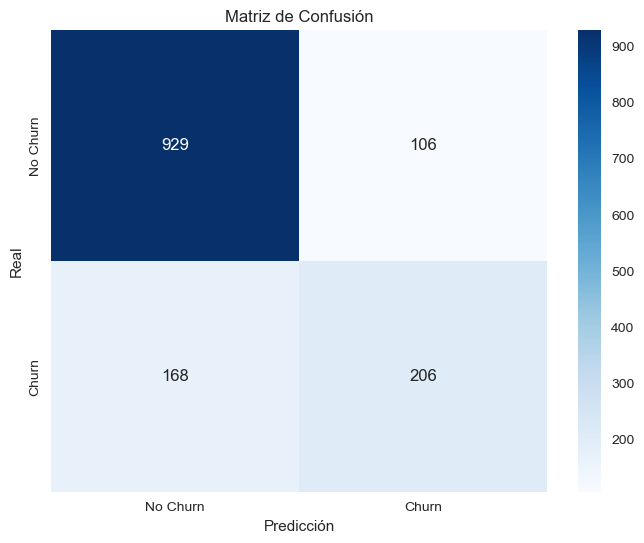

In [40]:
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir modelos con sus mejores hiperparámetros
best_rf = RandomForestClassifier(
    bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', 
    max_depth=10, max_features='sqrt', max_leaf_nodes=None, max_samples=None, 
    min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2, 
    min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=200, 
    n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False
)

best_cb = CatBoostClassifier(
    silent=True, random_state=42, depth=6, iterations=200, 
    l2_leaf_reg=3, learning_rate=0.01
)

best_nb = GaussianNB(
    priors=None, var_smoothing=1e-09
)

# Voting Classifier con votación dura
models = [('rf', best_rf), ('catboost', best_cb), ('nb', best_nb)]
voting_hard = VotingClassifier(estimators=models, voting='hard')
voting_hard.fit(X_train_prep_df, y_train)

# Evaluación del modelo
hard_score = voting_hard.score(X_test_prep_df, y_test)
print(f"Puntuación del VotingClassifier (votación dura): {hard_score}")

# Predicciones con votación dura
y_pred = voting_hard.predict(X_test_prep_df)

# Reporte de clasificación
print("\nReporte de Clasificación:")
Reporte_Voting_Hard=classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


### Regresión Logística

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hiperparámetros para la regresión logística
logistic_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Búsqueda de hiperparámetros
log_grid = GridSearchCV(LogisticRegression(random_state=42),
                        logistic_params,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)

log_grid.fit(X_train_prep_df, y_train)

# Mejor modelo
best_log = log_grid.best_estimator_
log_score = best_log.score(X_test_prep_df, y_test)


In [42]:
# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", log_grid.best_params_)

# Precisión del mejor modelo en conjunto de prueba
print(f"Precisión en test: {log_score:.4f}")


Mejores hiperparámetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Precisión en test: 0.8055



Reporte de Clasificación:


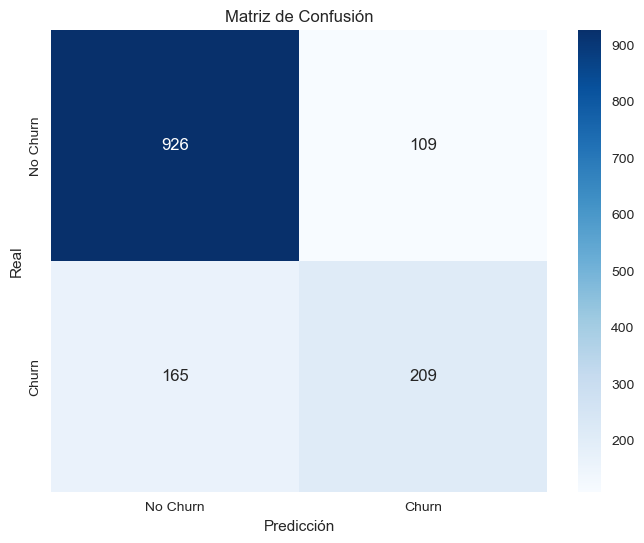

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste del modelo con hiperparámetros especificados
best_log = LogisticRegression(
    C=10,
    penalty='l1',
    solver='liblinear',
    random_state=42
)

best_log.fit(X_train_prep_df, y_train)

# Evaluación del modelo
y_pred = best_log.predict(X_test_prep_df)

# Reporte de clasificación
print("\nReporte de Clasificación:")
Reporte_Logistica=classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


# Comparativa de Modelos de Machine Learning (Orden Inverso)

| Modelo               | Tipo               | Hiperparámetros Óptimos                                                                 | Descripción                                                                                                                                 | Ventajas                                                                                     | Limitaciones                                                                                 |
|----------------------|--------------------|----------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| **Random Forest**      | Bagging (Árboles)  | `{'max_depth': 10, 'n_estimators': 200, 'min_samples_leaf': 2}`                        | Ensemble de árboles de decisión que promedia predicciones para mejorar generalización                                                       | - Maneja relaciones no lineales<br>- Robustez ante outliers                                 | - Menos interpretable que modelos lineales<br>- Puede ser costoso en datos de alta dimensión|
| **CatBoost**           | Gradient Boosting  | `{'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.01}`            | Algoritmo de boosting optimizado para variables categóricas, con manejo automático de categorías y prevención de overfitting                 | - Tratamiento nativo de categóricas<br>- Robustez ante overfitting                          | - Más lento que otros modelos en datasets grandes                                           |
| **Voting Classifier**  | Ensemble           | RF: `{'max_depth': 10, 'n_estimators': 200}`<br>CatBoost: `{'depth': 6, 'iterations': 200}`<br>NB: `{'var_smoothing': 1e-09}` | Combina predicciones de múltiples modelos (Random Forest, CatBoost, Naive Bayes) mediante votación                                          | - Reduce overfitting<br>- Aprovecha fortalezas de algoritmos diversos                       | - Mayor costo computacional<br>- Complejidad en interpretación                              |
| **Regresión Logística** | Modelo Lineal      | `{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}`                                    | Modelo lineal para clasificación binaria que transforma combinaciones lineales mediante sigmoide                                             | - Interpretable (coeficientes claros)<br>- Eficiente en datasets pequeños/medianos          | - Asume relación lineal<br>- Limitado para problemas complejos no lineales                  |



In [44]:
print("Reporte de Clasificación de Regresión Logística:")
print (Reporte_Logistica) 
print ("Reporte de Clasificación de Voting (Duro):")    
print (Reporte_Voting_Hard)
print ("Reporte de Clasificación de Voting (Suave):")
print (Reporte_Voting_suave)     
print ("Reporte de Clasificación de CatBoost:")   
print (Reporte_Catboost)
print ("Reporte de Clasificación de Random Forest:")
print (reporte_random)


Reporte de Clasificación de Regresión Logística:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1035
       Churn       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Reporte de Clasificación de Voting (Duro):
              precision    recall  f1-score   support

    No Churn       0.85      0.90      0.87      1035
       Churn       0.66      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Reporte de Clasificación de Voting (Suave):
              precision    recall  f1-score   support

    No Churn       0.90      0.74      0.81      1035
       Churn       0.52      0.78      0.62       374

    accuracy                           0.75   

### Análisis Consolidado

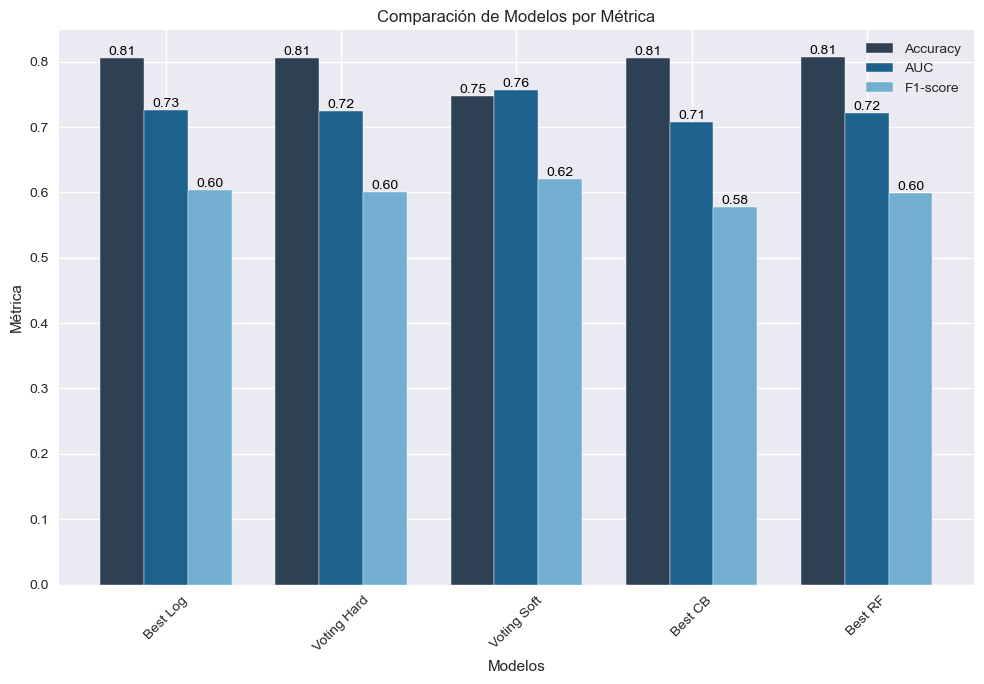

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Cerrar gráficos previos para evitar acumulaciones
plt.close('all')

# Obtener predicciones de cada modelo
predictions = {
    "Best Log": best_log.predict(X_test_prep_df),
    "Voting Hard": voting_hard.predict(X_test_prep_df),
    "Voting Soft": voting_soft.predict(X_test_prep_df),
    "Best CB": best_cb.predict(X_test_prep_df),
    "Best RF": best_rf.predict(X_test_prep_df),
}

# Calcular métricas reales
results = {}
for model, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model] = [accuracy, auc, f1]

# Métricas y colores más ejecutivos
metrics = ["Accuracy", "AUC", "F1-score"]
colors = ['#2E4053', '#1F618D', "#71AED0"]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 7))

x = np.arange(len(results))
width = 0.25  # Ancho de cada grupo de barras

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, [values[i] for values in results.values()], width, label=metric, color=colors[i])

# Ajustar diseño
ax.set_xlabel("Modelos")
ax.set_ylabel("Métrica")
ax.set_title("Comparación de Modelos por Métrica")
ax.set_xticks(x + width)
ax.set_xticklabels(results.keys(), rotation=45)
ax.legend()

# Agregar valores a cada barra
for i, metric in enumerate(metrics):
    for j, value in enumerate([values[i] for values in results.values()]):
        ax.text(j + i * width, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

# Mejorar distribución visual
plt.tight_layout()
plt.show()  # Eliminamos `block=True`


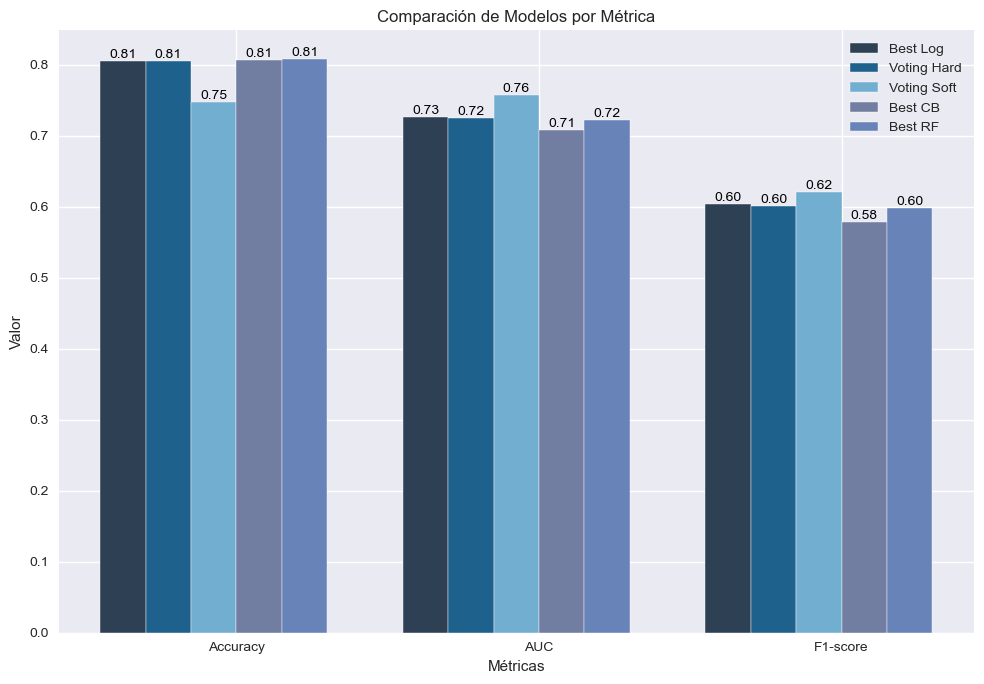

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Cerrar gráficos previos para evitar acumulaciones
plt.close('all')

# Obtener predicciones de cada modelo
predictions = {
    "Best Log": best_log.predict(X_test_prep_df),
    "Voting Hard": voting_hard.predict(X_test_prep_df),
    "Voting Soft": voting_soft.predict(X_test_prep_df),
    "Best CB": best_cb.predict(X_test_prep_df),
    "Best RF": best_rf.predict(X_test_prep_df),
}

# Calcular métricas reales
results = {
    "Accuracy": [],
    "AUC": [],
    "F1-score": []
}

models = list(predictions.keys())

for model, y_pred in predictions.items():
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["AUC"].append(roc_auc_score(y_test, y_pred))
    results["F1-score"].append(f1_score(y_test, y_pred))

# Colores más ejecutivos
colors = ['#2E4053', '#1F618D', "#71AED0", "#717DA1", "#6783B8"]

# Crear gráfico de barras agrupadas por métrica
x = np.arange(len(results))  # Número de métricas
width = 0.15  # Ancho de cada grupo de barras

fig, ax = plt.subplots(figsize=(10, 7))

for i, model in enumerate(models):
    ax.bar(x + i * width, [values[i] for values in results.values()], width, label=model, color=colors[i])

# Etiquetas y título
ax.set_xlabel("Métricas")
ax.set_ylabel("Valor")
ax.set_title("Comparación de Modelos por Métrica")
ax.set_xticks(x + width * (len(models) / 2))  
ax.set_xticklabels(results.keys(), rotation=0)
ax.legend()

# Agregar valores en cada barra
for i, model in enumerate(models):
    for j, value in enumerate([values[i] for values in results.values()]):
        ax.text(j + i * width, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


### Equilibrio de clases con SMOTE (solo el mejor modelo)

Distribución original de clases en y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64


c:\Users\Dc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Dc\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dc\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



Distribución de clases tras SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Resultados SIN SMOTE:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.67      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Resultados CON SMOTE:
              precision    recall  f1-score   support

    No Churn       0.88      0.79      0.83      1035
       Churn       0.55      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.78      1409



C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\1252069559.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette='Blues')
C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\1252069559.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, ax=axes[1], palette='Blues')


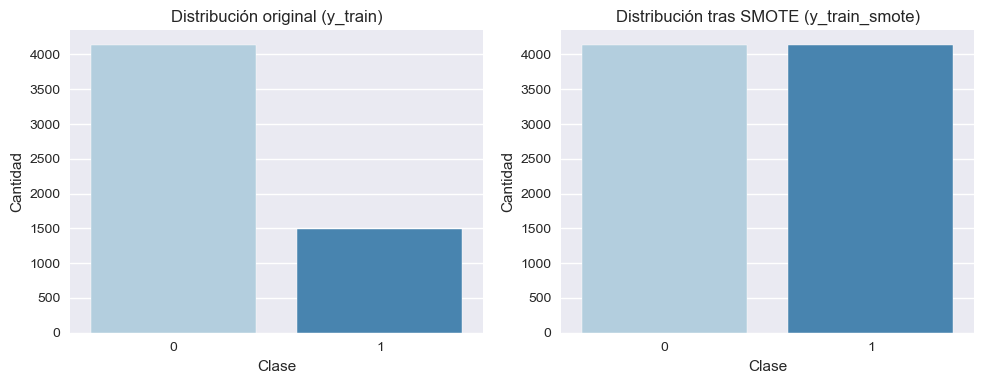


Justificación:
El dataset original presenta un desbalance de clases, donde la clase 'Churn' es minoritaria. 
SMOTE genera muestras sintéticas de la clase minoritaria para equilibrar la proporción de clases en el conjunto de entrenamiento.
Esto ayuda a que el modelo no esté sesgado hacia la clase mayoritaria y mejore la capacidad de detectar clientes que abandonan (Churn).
Comparando los resultados, se puede observar el impacto de SMOTE en las métricas de recall y f1-score para la clase minoritaria.



In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# 1. Verificar distribución original de clases
print("Distribución original de clases en y_train:")
print(y_train.value_counts(normalize=True))

# 2. Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_prep_df, y_train)

print("\nDistribución de clases tras SMOTE:")
print(pd.Series(y_train_smote).value_counts(normalize=True))

# 3. Entrenar Random Forest (mejores hiperparámetros) con y sin SMOTE
best_rf = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=2,
    n_estimators=200,
    random_state=42
)

# Sin SMOTE
best_rf.fit(X_train_prep_df, y_train)
y_pred_rf = best_rf.predict(X_test_prep_df)
print("\nResultados SIN SMOTE:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

# Con SMOTE
best_rf_smote = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=2,
    n_estimators=200,
    random_state=42
)
best_rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = best_rf_smote.predict(X_test_prep_df)
print("\nResultados CON SMOTE:")
print(classification_report(y_test, y_pred_rf_smote, target_names=['No Churn', 'Churn']))

# 4. Visualizar la distribución de clases antes y después de SMOTE
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x=y_train, ax=axes[0], palette='Blues')
axes[0].set_title('Distribución original (y_train)')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Cantidad')

sns.countplot(x=y_train_smote, ax=axes[1], palette='Blues')
axes[1].set_title('Distribución tras SMOTE (y_train_smote)')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

# 5. Justificación y comentario
print("""
Justificación:
El dataset original presenta un desbalance de clases, donde la clase 'Churn' es minoritaria. 
SMOTE genera muestras sintéticas de la clase minoritaria para equilibrar la proporción de clases en el conjunto de entrenamiento.
Esto ayuda a que el modelo no esté sesgado hacia la clase mayoritaria y mejore la capacidad de detectar clientes que abandonan (Churn).
Comparando los resultados, se puede observar el impacto de SMOTE en las métricas de recall y f1-score para la clase minoritaria.
""")

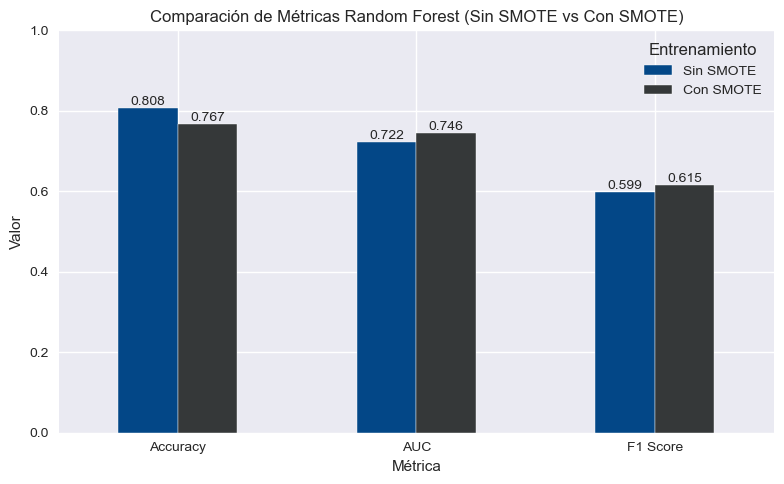

In [60]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Calcular métricas para ambos casos
metrics = {
    'Métrica': ['Accuracy', 'AUC', 'F1 Score'],
    'Sin SMOTE': [
        accuracy_score(y_test, y_pred_rf),
        roc_auc_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf)
    ],
    'Con SMOTE': [
        accuracy_score(y_test, y_pred_rf_smote),
        roc_auc_score(y_test, y_pred_rf_smote),
        f1_score(y_test, y_pred_rf_smote)
    ]
}

df_metrics = pd.DataFrame(metrics).set_index('Métrica')

# Graficar comparación con etiquetas
ax = df_metrics.plot(kind='bar', figsize=(8, 5), color=["#034787", "#353839"])
plt.title('Comparación de Métricas Random Forest (Sin SMOTE vs Con SMOTE)')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Entrenamiento')

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Análisis de importancia de características con el mejor modelo

C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\1065402066.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=feat_imp_df.head(top_n), palette='Blues_r')


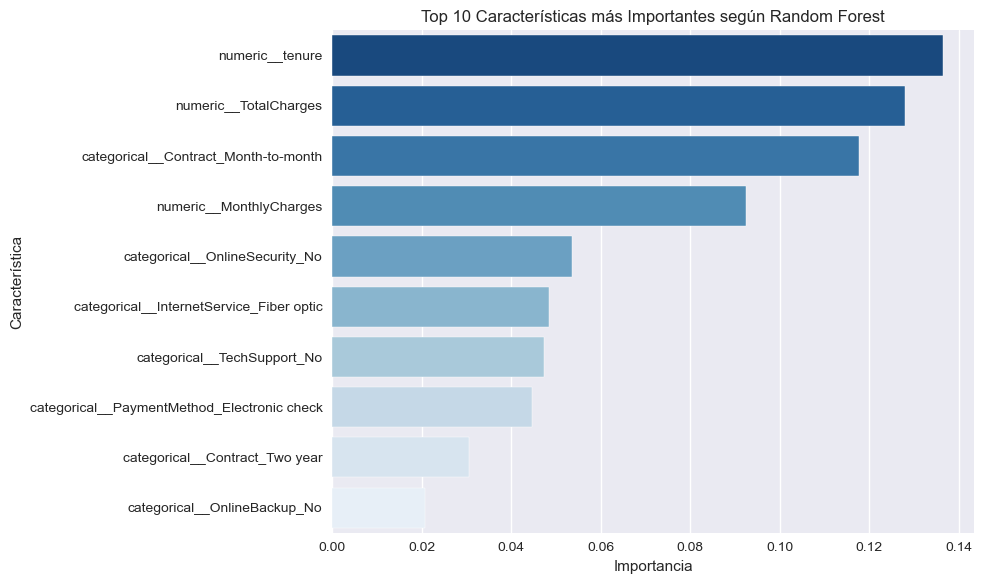

Características más relevantes seleccionadas:
                                 Característica  Importancia
1                               numeric__tenure     0.136629
3                         numeric__TotalCharges     0.128048
32         categorical__Contract_Month-to-month     0.117722
2                       numeric__MonthlyCharges     0.092587
14               categorical__OnlineSecurity_No     0.053682
12     categorical__InternetService_Fiber optic     0.048369
23                  categorical__TechSupport_No     0.047305
38  categorical__PaymentMethod_Electronic check     0.044716
34               categorical__Contract_Two year     0.030664
17                 categorical__OnlineBackup_No     0.020728

Justificación:
Las características seleccionadas son aquellas con mayor puntuación de importancia según el modelo Random Forest.
Estas variables contribuyen más a la predicción de la variable objetivo (Churn) y, por tanto, son clave para el análisis y la toma de decisiones.
La sele

In [69]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Obtener las importancias de las características del mejor modelo Random Forest
importances = best_rf.feature_importances_
feature_names_rf = X_train_prep_df.columns

# Crear un DataFrame ordenado por importancia
feat_imp_df = pd.DataFrame({
    'Característica': feature_names_rf,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Visualizar las 10 características más importantes
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feat_imp_df.head(top_n), palette='Blues_r')
plt.title(f'Top {top_n} Características más Importantes según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

# Mostrar tabla de las características más relevantes
print("Características más relevantes seleccionadas:")
print(feat_imp_df.head(top_n))

# Justificación:
print("""
Justificación:
Las características seleccionadas son aquellas con mayor puntuación de importancia según el modelo Random Forest.
Estas variables contribuyen más a la predicción de la variable objetivo (Churn) y, por tanto, son clave para el análisis y la toma de decisiones.
La selección se basa en el ranking de importancia proporcionado por el modelo, que mide la contribución de cada variable a la reducción de la impureza en los árboles del bosque.
""")

C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\1065402066.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=feat_imp_df.head(top_n), palette='Blues_r')


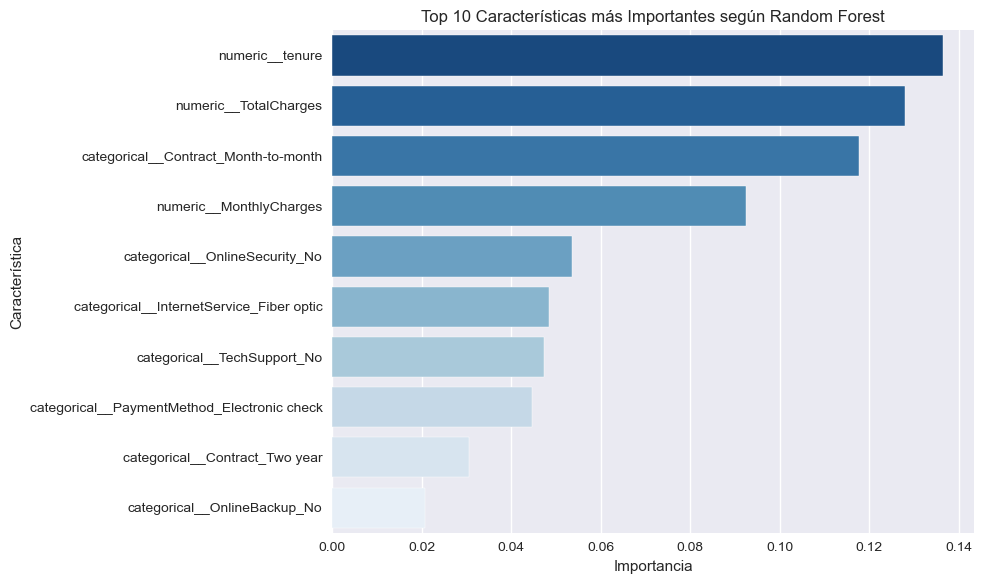

Características más relevantes seleccionadas:
                                 Característica  Importancia
1                               numeric__tenure     0.136629
3                         numeric__TotalCharges     0.128048
32         categorical__Contract_Month-to-month     0.117722
2                       numeric__MonthlyCharges     0.092587
14               categorical__OnlineSecurity_No     0.053682
12     categorical__InternetService_Fiber optic     0.048369
23                  categorical__TechSupport_No     0.047305
38  categorical__PaymentMethod_Electronic check     0.044716
34               categorical__Contract_Two year     0.030664
17                 categorical__OnlineBackup_No     0.020728

Justificación:
Las características seleccionadas son aquellas con mayor puntuación de importancia según el modelo Random Forest.
Estas variables contribuyen más a la predicción de la variable objetivo (Churn) y, por tanto, son clave para el análisis y la toma de decisiones.
La sele

In [70]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Obtener las importancias de las características del mejor modelo Random Forest
importances = best_rf.feature_importances_
feature_names_rf = X_train_prep_df.columns

# Crear un DataFrame ordenado por importancia
feat_imp_df = pd.DataFrame({
    'Característica': feature_names_rf,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Visualizar las 10 características más importantes
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feat_imp_df.head(top_n), palette='Blues_r')
plt.title(f'Top {top_n} Características más Importantes según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

# Mostrar tabla de las características más relevantes
print("Características más relevantes seleccionadas:")
print(feat_imp_df.head(top_n))

# Justificación:
print("""
Justificación:
Las características seleccionadas son aquellas con mayor puntuación de importancia según el modelo Random Forest.
Estas variables contribuyen más a la predicción de la variable objetivo (Churn) y, por tanto, son clave para el análisis y la toma de decisiones.
La selección se basa en el ranking de importancia proporcionado por el modelo, que mide la contribución de cada variable a la reducción de la impureza en los árboles del bosque.
""")

In [79]:

feat_imp_df.describe()

,Importancia
count,40.000000
mean,0.025000
std,0.034552
min,0.002655
25%,0.007435
50%,0.010720
75%,0.019318
max,0.136629


In [71]:
import sklearn
print(sklearn.__version__)


1.6.1


In [72]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv  # Requerido para activar HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Seleccionar las N características más importantes
top_features = feat_imp_df.head(top_n)['Característica'].tolist()
X_top = X_train_prep_df[top_features]
X_test_top = X_test_prep_df[top_features]

# Hiperparámetros para Hyperband (HalvingGridSearchCV)
hyperband_params = {
    'max_depth': [6, 10, 14],
    'min_samples_leaf': [1, 2, 4]
}

# Entrenamiento con todas las características
start_all = time.time()
rf_all = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200, random_state=42)
rf_all.fit(X_train_prep_df, y_train)
train_time_all = time.time() - start_all

# Evaluar el modelo con todas las características
y_pred_all = rf_all.predict(X_test_prep_df)
score_all = accuracy_score(y_test, y_pred_all)
auc_all = roc_auc_score(y_test, rf_all.predict_proba(X_test_prep_df)[:, 1])
f1_all = f1_score(y_test, y_pred_all)

# Entrenamiento con solo las características más importantes usando Hyperband
start_top = time.time()
rf_hyperband = HalvingGridSearchCV(
    RandomForestClassifier(random_state=42),
    hyperband_params,
    factor=2,
    resource='n_estimators',
    max_resources=300,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
rf_hyperband.fit(X_top, y_train)
train_time_top = time.time() - start_top
best_rf_top = rf_hyperband.best_estimator_

# Evaluar el modelo con las características seleccionadas
y_pred_top = best_rf_top.predict(X_test_top)
score_top = accuracy_score(y_test, y_pred_top)
auc_top = roc_auc_score(y_test, best_rf_top.predict_proba(X_test_top)[:, 1])
f1_top = f1_score(y_test, y_pred_top)

# Resultados comparativos
results = pd.DataFrame({
    'Modelo': ['Todas las características', 'Top {} características (Hyperband)'.format(top_n)],
    'Accuracy': [score_all, score_top],
    'AUC': [auc_all, auc_top],
    'F1-score': [f1_all, f1_top],
    'Tiempo de entrenamiento (s)': [train_time_all, train_time_top]
})




In [80]:
X_train_prep_df.describe()

,numeric__SeniorCitizen,numeric__tenure,numeric__MonthlyCharges,numeric__TotalCharges,categorical__gender_Male,categorical__Partner_Yes,categorical__Dependents_Yes,categorical__PhoneService_Yes,categorical__MultipleLines_No,categorical__MultipleLines_No phone service,...,categorical__StreamingMovies_No internet service,categorical__StreamingMovies_Yes,categorical__Contract_Month-to-month,categorical__Contract_One year,categorical__Contract_Two year,categorical__PaperlessBilling_Yes,categorical__PaymentMethod_Bank transfer (automatic),categorical__PaymentMethod_Credit card (automatic),categorical__PaymentMethod_Electronic check,categorical__PaymentMethod_Mailed check
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,...,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.163294,0.075763,-0.102508,0.263744,0.502840,0.484381,0.298012,0.900781,0.476571,0.099219,...,0.215477,0.391019,0.550586,0.208200,0.241214,0.591232,0.220802,0.215300,0.335641,0.228257
std,0.369667,0.534103,0.554647,0.664671,0.500036,0.499800,0.457425,0.298982,0.499495,0.298982,...,0.411190,0.488022,0.497479,0.406057,0.427858,0.491650,0.414824,0.411067,0.472256,0.419746
min,0.000000,-0.630435,-0.958822,-0.402286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.434783,-0.641132,-0.288483,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.565217,0.358868,0.711517,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.934783,0.887969,2.126460,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Comparativa de rendimiento:
                               Modelo  Accuracy       AUC  F1-score  \
0           Todas las características  0.807665  0.839576  0.598519   
1  Top 10 características (Hyperband)  0.800568  0.842798  0.574887   

   Tiempo de entrenamiento (s)  
0                     0.821299  
1                     4.398951  


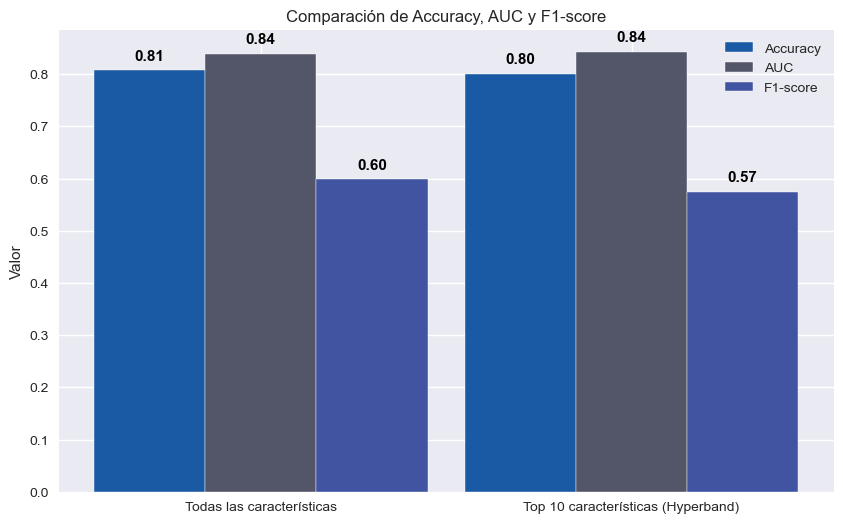

In [73]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv  # Requerido para activar HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Seleccionar las N características más importantes
top_features = feat_imp_df.head(top_n)['Característica'].tolist()
X_top = X_train_prep_df[top_features]
X_test_top = X_test_prep_df[top_features]

# Hiperparámetros para Hyperband (HalvingGridSearchCV)
hyperband_params = {
    'max_depth': [6, 10, 14],
    'min_samples_leaf': [1, 2, 4]
}

# Entrenamiento con todas las características
start_all = time.time()
rf_all = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200, random_state=42)
rf_all.fit(X_train_prep_df, y_train)
train_time_all = time.time() - start_all

# Evaluar el modelo con todas las características
y_pred_all = rf_all.predict(X_test_prep_df)
score_all = accuracy_score(y_test, y_pred_all)
auc_all = roc_auc_score(y_test, rf_all.predict_proba(X_test_prep_df)[:, 1])
f1_all = f1_score(y_test, y_pred_all)

# Entrenamiento con solo las características más importantes usando Hyperband
start_top = time.time()
rf_hyperband = HalvingGridSearchCV(
    RandomForestClassifier(random_state=42),
    hyperband_params,
    factor=2,
    resource='n_estimators',
    max_resources=300,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
rf_hyperband.fit(X_top, y_train)
train_time_top = time.time() - start_top
best_rf_top = rf_hyperband.best_estimator_

# Evaluar el modelo con las características seleccionadas
y_pred_top = best_rf_top.predict(X_test_top)
score_top = accuracy_score(y_test, y_pred_top)
auc_top = roc_auc_score(y_test, best_rf_top.predict_proba(X_test_top)[:, 1])
f1_top = f1_score(y_test, y_pred_top)

# Resultados comparativos
results = pd.DataFrame({
    'Modelo': ['Todas las características', f'Top {top_n} características (Hyperband)'],
    'Accuracy': [score_all, score_top],
    'AUC': [auc_all, auc_top],
    'F1-score': [f1_all, f1_top],
    'Tiempo de entrenamiento (s)': [train_time_all, train_time_top]
})

print("\nComparativa de rendimiento:")
print(results)

# Gráfico comparativo de Accuracy, AUC y F1-score
bar_width = 0.3
x = np.arange(len(results['Modelo']))

fig, ax = plt.subplots(figsize=(10, 6))

bars_accuracy = ax.bar(x - bar_width, results['Accuracy'], bar_width, label='Accuracy', color="#1A5AA4")
bars_auc = ax.bar(x, results['AUC'], bar_width, label='AUC', color="#535568")
bars_f1 = ax.bar(x + bar_width, results['F1-score'], bar_width, label='F1-score', color="#4154A1")

ax.set_xticks(x)
ax.set_xticklabels(results['Modelo'])
ax.set_ylabel('Valor')
ax.set_title('Comparación de Accuracy, AUC y F1-score')
ax.legend()

# Agregar labels sobre cada barra
for bars in [bars_accuracy, bars_auc, bars_f1]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 5), 
                    textcoords="offset points", 
                    ha='center', va='bottom', 
                    fontsize=11, fontweight='bold', color='black')

plt.show()



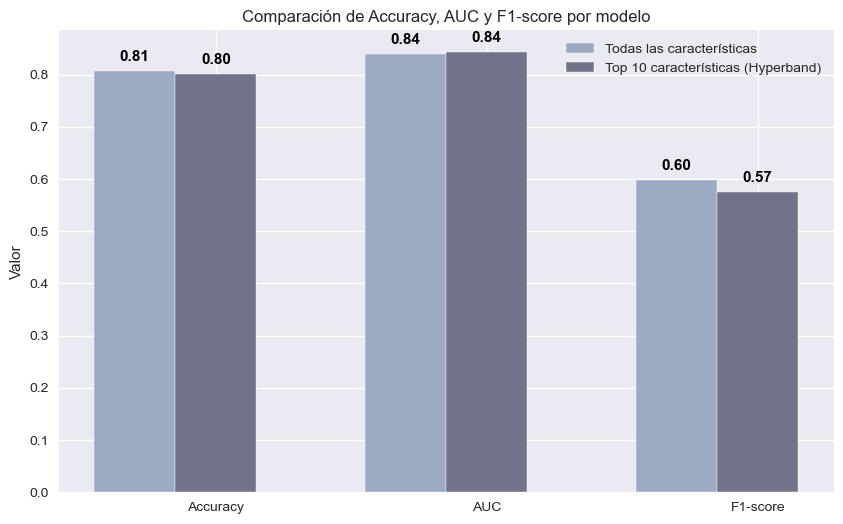

In [74]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Seleccionar las N características más importantes
top_features = feat_imp_df.head(top_n)['Característica'].tolist()
X_top = X_train_prep_df[top_features]
X_test_top = X_test_prep_df[top_features]

# Hiperparámetros para Hyperband
hyperband_params = {
    'max_depth': [6, 10, 14],
    'min_samples_leaf': [1, 2, 4]
}

# Entrenamiento con todas las características
start_all = time.time()
rf_all = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200, random_state=42)
rf_all.fit(X_train_prep_df, y_train)
train_time_all = time.time() - start_all

# Evaluar el modelo con todas las características
y_pred_all = rf_all.predict(X_test_prep_df)
score_all = accuracy_score(y_test, y_pred_all)
auc_all = roc_auc_score(y_test, rf_all.predict_proba(X_test_prep_df)[:, 1])
f1_all = f1_score(y_test, y_pred_all)

# Entrenamiento con solo las características más importantes usando Hyperband
start_top = time.time()
rf_hyperband = HalvingGridSearchCV(
    RandomForestClassifier(random_state=42),
    hyperband_params,
    factor=2,
    resource='n_estimators',
    max_resources=300,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
rf_hyperband.fit(X_top, y_train)
train_time_top = time.time() - start_top
best_rf_top = rf_hyperband.best_estimator_

# Evaluar el modelo con las características seleccionadas
y_pred_top = best_rf_top.predict(X_test_top)
score_top = accuracy_score(y_test, y_pred_top)
auc_top = roc_auc_score(y_test, best_rf_top.predict_proba(X_test_top)[:, 1])
f1_top = f1_score(y_test, y_pred_top)

# Resultados comparativos
results = pd.DataFrame({
    'Métrica': ['Accuracy', 'AUC', 'F1-score'],
    'Todas las características': [score_all, auc_all, f1_all],
    f'Top {top_n} características (Hyperband)': [score_top, auc_top, f1_top]
})

# Gráfico comparativo con métricas en el eje X
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(results['Métrica']))
bar_width = 0.3

bars_all = ax.bar(x - bar_width, results['Todas las características'], bar_width, label='Todas las características', color="#9DAAC4")
bars_top = ax.bar(x, results[f'Top {top_n} características (Hyperband)'], bar_width, label=f'Top {top_n} características (Hyperband)', color="#71738A")

# Agregar etiquetas con los valores sobre las barras
for bars in [bars_all, bars_top]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Desplazamiento en píxeles
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=11, fontweight='bold', color='black')

ax.set_xticks(x)
ax.set_xticklabels(results['Métrica'])
ax.set_ylabel('Valor')
ax.set_title('Comparación de Accuracy, AUC y F1-score por modelo')
ax.legend()

plt.show()



### Experimentación con PCA

Comparativa de rendimiento con y sin PCA:
    Métrica  Todas las características  Top 10 características  PCA (10 comp.)
0  Accuracy                   0.807665                0.800568        0.789922
1       AUC                   0.839576                0.842798        0.830778
2  F1-score                   0.598519                0.574887        0.558209


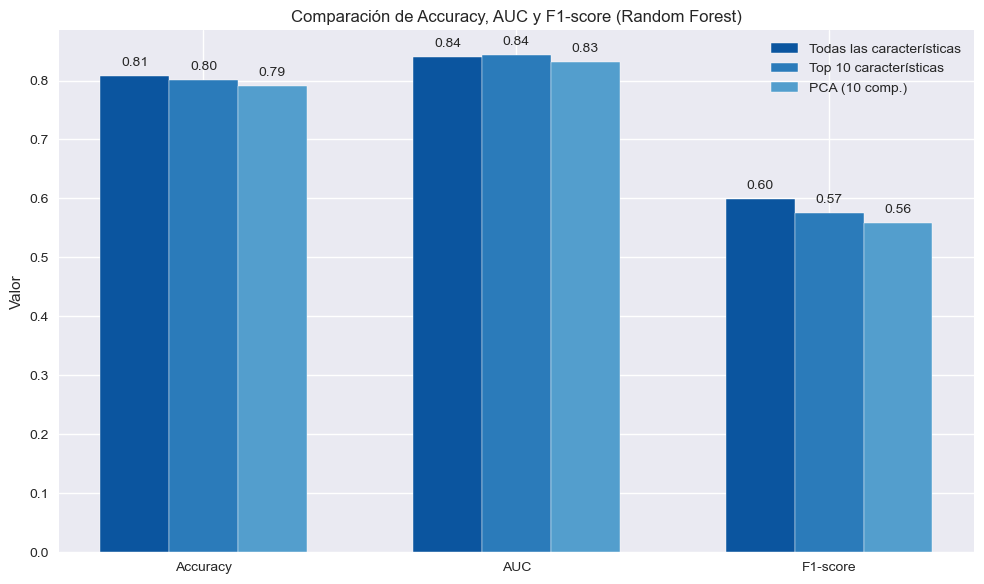

In [76]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import pandas as pd

import matplotlib.pyplot as plt

# 1. Aplicar PCA al conjunto reducido (top_features)
n_components = min(len(top_features), 10)  # Usar hasta 10 componentes o menos si hay menos features
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train_prep_df[top_features])
X_test_pca = pca.transform(X_test_prep_df[top_features])

# 2. Entrenar el mejor modelo (Random Forest) con los datos transformados por PCA
rf_pca = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

# 3. Calcular métricas de rendimiento
acc_pca = accuracy_score(y_test, y_pred_pca)
auc_pca = roc_auc_score(y_test, rf_pca.predict_proba(X_test_pca)[:, 1])
f1_pca = f1_score(y_test, y_pred_pca)

# 4. Comparar con modelo sin reducción y modelo con top features
# Ya existen: score_all, auc_all, f1_all (todas las características)
#             score_top, auc_top, f1_top (top_features)

results_pca = pd.DataFrame({
    'Métrica': ['Accuracy', 'AUC', 'F1-score'],
    'Todas las características': [score_all, auc_all, f1_all],
    f'Top {top_n} características': [score_top, auc_top, f1_top],
    f'PCA ({n_components} comp.)': [acc_pca, auc_pca, f1_pca]
})

print("Comparativa de rendimiento con y sin PCA:")
print(results_pca)

# 5. Gráfico comparativo
bar_width = 0.22
x = range(len(results_pca['Métrica']))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar([i - bar_width for i in x], results_pca['Todas las características'], bar_width, label='Todas las características')
bars2 = ax.bar(x, results_pca[f'Top {top_n} características'], bar_width, label=f'Top {top_n} características')
bars3 = ax.bar([i + bar_width for i in x], results_pca[f'PCA ({n_components} comp.)'], bar_width, label=f'PCA ({n_components} comp.)')

ax.set_xticks(x)
ax.set_xticklabels(results_pca['Métrica'])
ax.set_ylabel('Valor')
ax.set_title('Comparación de Accuracy, AUC y F1-score (Random Forest)')
ax.legend()

# Etiquetas sobre las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 5), 
                    textcoords="offset points", 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Experimentación con t-SNE

Comparativa de rendimiento con PCA y t-SNE:
    Métrica  Todas las características  Top 10 características  \
0  Accuracy                   0.807665                0.800568   
1       AUC                   0.839576                0.842798   
2  F1-score                   0.598519                0.574887   

   PCA (10 comp.)  t-SNE (2D)  
0        0.789922    0.747339  
1        0.830778    0.763369  
2        0.558209    0.447205  


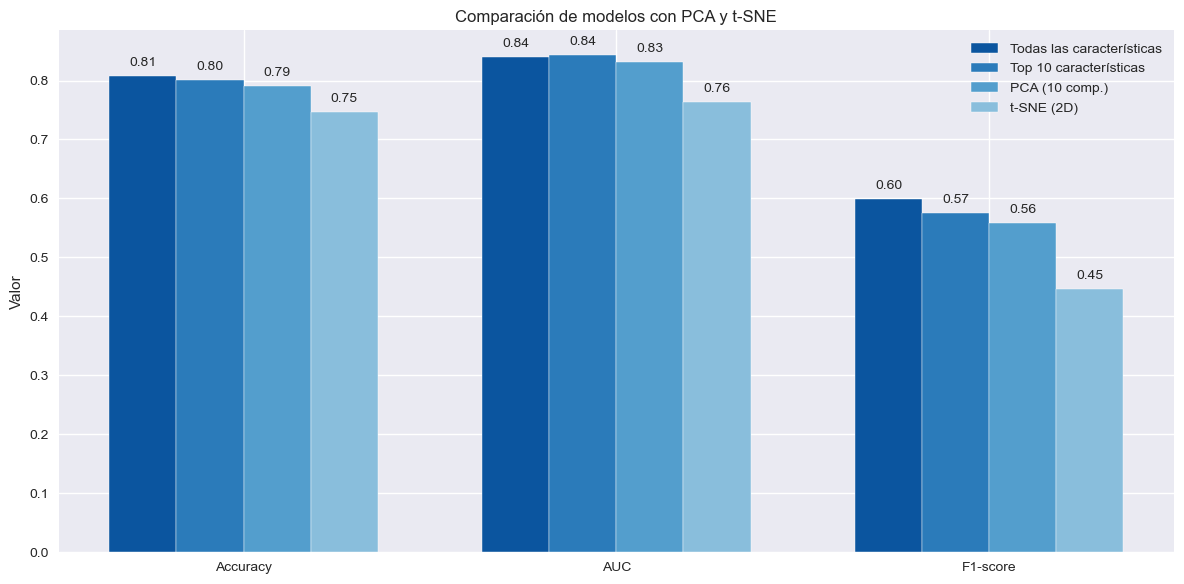

In [77]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reducción de dimensionalidad con PCA
n_components = min(len(top_features), 10)  # Usar hasta 10 componentes o menos si hay menos características
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train_prep_df[top_features])
X_test_pca = pca.transform(X_test_prep_df[top_features])

# 2. Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)  # t-SNE suele usarse con 2 dimensiones para visualización
X_train_tsne = tsne.fit_transform(X_train_prep_df[top_features])
X_test_tsne = tsne.fit_transform(X_test_prep_df[top_features])  # No se usa .transform en t-SNE

# 3. Entrenamiento del modelo con datos originales, PCA y t-SNE
rf_pca = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

rf_tsne = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200, random_state=42)
rf_tsne.fit(X_train_tsne, y_train)
y_pred_tsne = rf_tsne.predict(X_test_tsne)

# 4. Cálculo de métricas de rendimiento
acc_pca = accuracy_score(y_test, y_pred_pca)
auc_pca = roc_auc_score(y_test, rf_pca.predict_proba(X_test_pca)[:, 1])
f1_pca = f1_score(y_test, y_pred_pca)

acc_tsne = accuracy_score(y_test, y_pred_tsne)
auc_tsne = roc_auc_score(y_test, rf_tsne.predict_proba(X_test_tsne)[:, 1])
f1_tsne = f1_score(y_test, y_pred_tsne)

# 5. Comparación de resultados
results_comparison = pd.DataFrame({
    'Métrica': ['Accuracy', 'AUC', 'F1-score'],
    'Todas las características': [score_all, auc_all, f1_all],
    f'Top {top_n} características': [score_top, auc_top, f1_top],
    f'PCA ({n_components} comp.)': [acc_pca, auc_pca, f1_pca],
    't-SNE (2D)': [acc_tsne, auc_tsne, f1_tsne]
})

print("Comparativa de rendimiento con PCA y t-SNE:")
print(results_comparison)

# 6. Gráfico comparativo
bar_width = 0.18
x = range(len(results_comparison['Métrica']))

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar([i - bar_width * 1.5 for i in x], results_comparison['Todas las características'], bar_width, label='Todas las características')
bars2 = ax.bar([i - bar_width / 2 for i in x], results_comparison[f'Top {top_n} características'], bar_width, label=f'Top {top_n} características')
bars3 = ax.bar([i + bar_width / 2 for i in x], results_comparison[f'PCA ({n_components} comp.)'], bar_width, label=f'PCA ({n_components} comp.)')
bars4 = ax.bar([i + bar_width * 1.5 for i in x], results_comparison['t-SNE (2D)'], bar_width, label='t-SNE (2D)')

ax.set_xticks(x)
ax.set_xticklabels(results_comparison['Métrica'])
ax.set_ylabel('Valor')
ax.set_title('Comparación de modelos con PCA y t-SNE')
ax.legend()

# Etiquetas sobre las barras
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 5), 
                    textcoords="offset points", 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Definir los modelos base
estimators = [
    ('rf', RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200, random_state=42)),
    ('logreg', LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=42))
]

# Meta-modelo: Regresión logística (puedes cambiarlo si lo deseas)
meta_model = LogisticRegression(random_state=42)

# Crear el stacking classifier
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Entrenar el meta-classifier
stacking.fit(X_train_prep_df, y_train)

# Evaluar en el conjunto de prueba
stacking_score = stacking.score(X_test_prep_df, y_test)
print(f"Accuracy del Meta-Classifier (Stacking): {stacking_score:.4f}")

# Reporte de clasificación
y_pred_stack = stacking.predict(X_test_prep_df)
print("\nReporte de Clasificación del Meta-Classifier:")
print(classification_report(y_test, y_pred_stack, target_names=['No Churn', 'Churn']))

Accuracy del Meta-Classifier (Stacking): 0.8034

Reporte de Clasificación del Meta-Classifier:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Definir los modelos base
estimators = [
    ('rf', RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200, random_state=42)),
    ('logreg', LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=42))
]

# Meta-modelo
meta_model = LogisticRegression(random_state=42)

# Crear el stacking classifier
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Entrenar el modelo
stacking.fit(X_train_prep_df, y_train)

# Predicciones
y_pred_stack = stacking.predict(X_test_prep_df)
y_pred_proba = stacking.predict_proba(X_test_prep_df)[:, 1]  # Probabilidad para AUC

# Evaluación de métricas
accuracy = accuracy_score(y_test, y_pred_stack)
auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred_stack)

print(f"🔹 Accuracy del Meta-Classifier (Stacking): {accuracy:.4f}")
print(f"🔹 AUC del Meta-Classifier: {auc:.4f}")
print(f"🔹 F1-score del Meta-Classifier: {f1:.4f}")

# Reporte detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_stack, target_names=['No Churn', 'Churn']))


🔹 Accuracy del Meta-Classifier (Stacking): 0.8034
🔹 AUC del Meta-Classifier: 0.8437
🔹 F1-score del Meta-Classifier: 0.5896

Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



```markdown
#### Diagrama de bloques del proceso de aprendizaje automático

```mermaid
flowchart TD
    A[Recopilación de Datos] --> B[Limpieza y Preprocesamiento]
    B --> C[Análisis Exploratorio de Datos]
    C --> D[Ingeniería de Características]
    D --> E[División de Datos (Train/Test)]
    E --> F[Entrenamiento de Modelos]
    F --> G[Evaluación de Modelos]
    G --> H[Selección y Ajuste de Hiperparámetros]
    H --> I[Validación Final]
    I --> J[Despliegue/Producción del Modelo]
```

**Descripción de cada bloque:**
- **Recopilación de Datos:** Obtención de datos relevantes para el problema.
- **Limpieza y Preprocesamiento:** Tratamiento de valores nulos, codificación de variables, escalado, etc.
- **Análisis Exploratorio de Datos:** Visualización y comprensión de la distribución y relaciones entre variables.
- **Ingeniería de Características:** Creación, selección o transformación de variables predictoras.
- **División de Datos:** Separación en conjuntos de entrenamiento y prueba.
- **Entrenamiento de Modelos:** Aplicación de algoritmos de ML sobre los datos de entrenamiento.
- **Evaluación de Modelos:** Medición del desempeño usando métricas apropiadas.
- **Selección y Ajuste de Hiperparámetros:** Optimización de parámetros para mejorar el rendimiento.
- **Validación Final:** Prueba del modelo sobre datos no vistos.
- **Despliegue/Producción:** Implementación del modelo en un entorno real para predicciones.
```

## Importación de PKL y nuevos Modelos sin escalado para Streamlite

In [83]:
import pickle

# Guardar el modelo entrenado con todas las características
with open("random_forest.pkl", "wb") as f:
    pickle.dump(rf_all, f)

# Guardar el mejor modelo entrenado con características seleccionadas
with open("best_random_forest.pkl", "wb") as f:
    pickle.dump(best_rf_top, f)


### Modelo sin Escalar Random Forest

In [169]:
ruta= (r'C:\Users\Dc\Documents\Maestría_Data_Science\Aprendizaje_Machine_Learning\Datasets\Clientes_Telecomunicaciones.csv')
df = pd.read_csv(ruta, sep=',', encoding='latin1')

In [170]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#X = pd.get_dummies(df.drop(['Churn', 'customerID'], axis=1), drop_first=True)


In [134]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Label Encoding para variables categóricas binarias
label_cols = ['Dependents', 'PhoneService', 'PaperlessBilling', 
              'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in label_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Asegurarse de que TotalCharges sea numérico y manejar valores vacíos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Imputar valores nulos en TotalCharges con la mediana (puedes cambiar por media u otro método si prefieres)
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

# Normalización de variables numéricas
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [125]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,0,0.013889,0,1,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,0.115423,0.001275,No
1,5575-GNVDE,Male,0,No,0,0.472222,1,0,DSL,2,...,2,0,0,0,One year,0,Mailed check,0.385075,0.215867,No
2,3668-QPYBK,Male,0,No,0,0.027778,1,0,DSL,2,...,0,0,0,0,Month-to-month,1,Mailed check,0.354229,0.010310,Yes
3,7795-CFOCW,Male,0,No,0,0.625000,0,1,DSL,2,...,2,2,0,0,One year,0,Bank transfer (automatic),0.239303,0.210241,No
4,9237-HQITU,Female,0,No,0,0.027778,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,0.521891,0.015330,Yes


In [126]:
df.describe()

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.299588,0.449599,0.903166,0.940508,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.592219,0.462803,0.261149
std,0.368612,0.458110,0.341104,0.295752,0.948554,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.491457,0.299403,0.261397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171642,0.044245
50%,0.000000,0.000000,0.402778,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.518408,0.159090
75%,0.000000,1.000000,0.763889,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.712438,0.434780
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [135]:
df = df.drop('customerID', axis=1)


### Modelo y gráfico de Indicadores

In [128]:
print(y_full.value_counts())



Churn
No     5174
Yes    1869
Name: count, dtype: int64


## Código RF

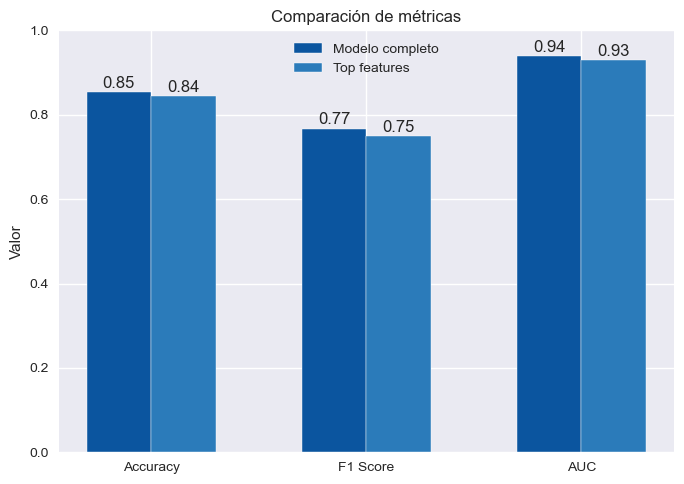

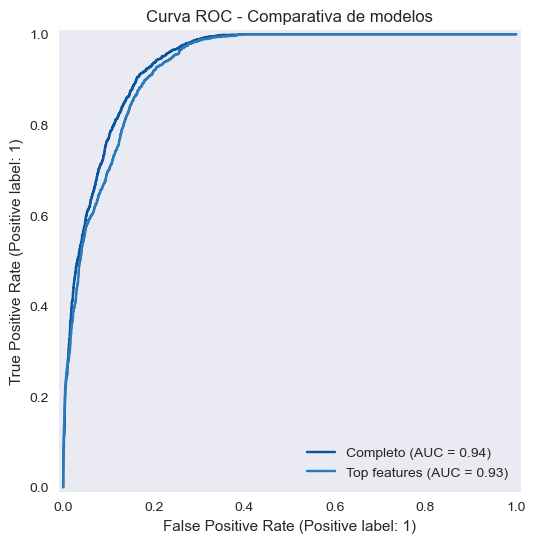

In [ ]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Convertir clase objetivo a binaria
y_full = df['Churn']
y_full_bin = (y_full == 'Yes').astype(int)

# Preparar conjunto de entrada: excluir ID si está presente
X_full = df.drop(['Churn'], axis=1)
if 'customerID' in X_full.columns:
    X_full = X_full.drop('customerID', axis=1)

# Separar columnas numéricas y categóricas
categorical_cols = X_full.select_dtypes(include='object').columns
numeric_cols = X_full.select_dtypes(exclude='object').columns

# Crear copia del dataframe original para trabajar
X_processed = X_full.copy()

# Aplicar LabelEncoder solo a variables categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_processed[col] = le.fit_transform(X_full[col].astype(str))
    label_encoders[col] = le

# Las variables numéricas se mantienen exactamente igual que en el original
X_full_encoded = X_processed

# Modelo completo con balanceo de clases
rf_all = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                              random_state=42, class_weight='balanced')
rf_all.fit(X_full_encoded, y_full_bin)

# Importancia de características
importances = rf_all.feature_importances_
features = X_full_encoded.columns
feat_imp_df = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp_df.sort_values(by='importance', ascending=False, inplace=True)
feat_imp_df['cumulative_importance'] = feat_imp_df['importance'].cumsum()

# Selección de top features (hasta 75% acumulado)
selected_features = feat_imp_df[feat_imp_df['cumulative_importance'] <= 0.75]['feature'].tolist()
if len(selected_features) < len(feat_imp_df):
    if feat_imp_df['cumulative_importance'].iloc[len(selected_features)] < 0.75:
        selected_features.append(feat_imp_df['feature'].iloc[len(selected_features)])

# Modelo reducido con solo top features
X_top = X_full_encoded[selected_features]
rf_top = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                              random_state=42, class_weight='balanced')
rf_top.fit(X_top, y_full_bin)

# Guardar modelos entrenados y los label encoders
with open("rf_all_features.pkl", "wb") as f:
    pickle.dump(rf_all, f)
with open("rf_top_features.pkl", "wb") as f:
    pickle.dump(rf_top, f)
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# Predicciones
y_pred_all = rf_all.predict(X_full_encoded)
y_prob_all = rf_all.predict_proba(X_full_encoded)[:, 1]
y_pred_top = rf_top.predict(X_top)
y_prob_top = rf_top.predict_proba(X_top)[:, 1]

# Métricas
metrics_all = [
    accuracy_score(y_full_bin, y_pred_all),
    f1_score(y_full_bin, y_pred_all),
    roc_auc_score(y_full_bin, y_prob_all)
]
metrics_top = [
    accuracy_score(y_full_bin, y_pred_top),
    f1_score(y_full_bin, y_pred_top),
    roc_auc_score(y_full_bin, y_prob_top)
]

# Visualización de métricas
labels = ['Accuracy', 'F1 Score', 'AUC']
x = range(len(labels))

plt.figure(figsize=(7, 5))
plt.bar([i - 0.15 for i in x], metrics_all, width=0.3, label='Modelo completo')
plt.bar([i + 0.15 for i in x], metrics_top, width=0.3, label='Top features')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('Valor')
plt.title('Comparación de métricas')
plt.legend()
for i, v in enumerate(metrics_all):
    plt.text(i - 0.15, v + 0.01, f"{v:.2f}", ha='center')
for i, v in enumerate(metrics_top):
    plt.text(i + 0.15, v + 0.01, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Curvas ROC
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_full_bin, y_prob_all, name='Completo', ax=plt.gca())
RocCurveDisplay.from_predictions(y_full_bin, y_prob_top, name='Top features', ax=plt.gca())
plt.title('Curva ROC - Comparativa de modelos')
plt.grid()
plt.show()

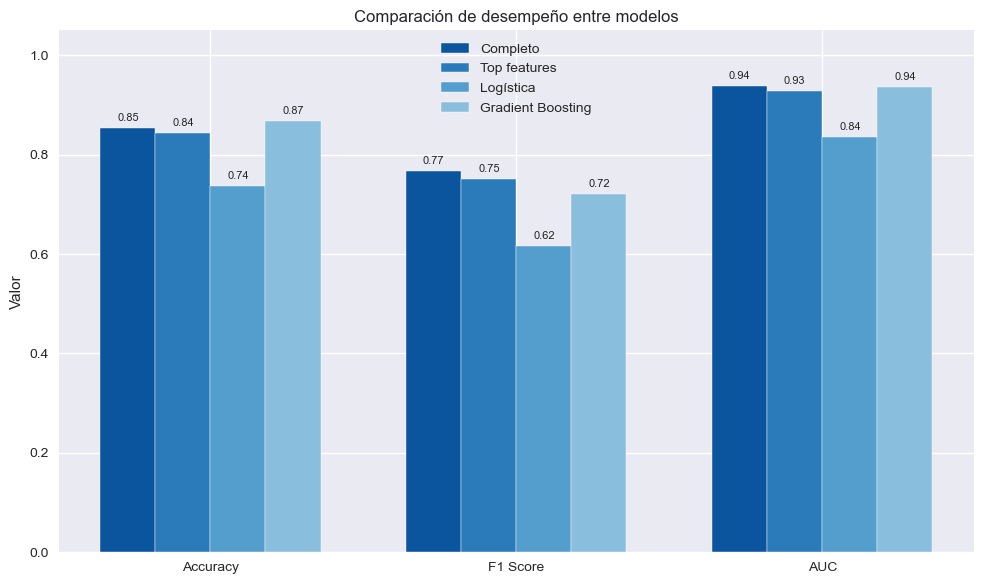

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder

# Convertir clase objetivo a binaria
y_full = df['Churn']
y_full_bin = (y_full == 'Yes').astype(int)

# Preparar conjunto de entrada
X_full = df.drop(['Churn'], axis=1)
if 'customerID' in X_full.columns:
    X_full = X_full.drop('customerID', axis=1)

# Codificación
categorical_cols = X_full.select_dtypes(include='object').columns
numeric_cols = X_full.select_dtypes(exclude='object').columns

X_processed = X_full.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_processed[col] = le.fit_transform(X_full[col].astype(str))
    label_encoders[col] = le

X_full_encoded = X_processed

# Modelo completo
rf_all = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                                random_state=42, class_weight='balanced')
rf_all.fit(X_full_encoded, y_full_bin)

# Importancia de características
importances = rf_all.feature_importances_
features = X_full_encoded.columns
feat_imp_df = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp_df.sort_values(by='importance', ascending=False, inplace=True)
feat_imp_df['cumulative_importance'] = feat_imp_df['importance'].cumsum()

# Selección de top features
selected_features = feat_imp_df[feat_imp_df['cumulative_importance'] <= 0.75]['feature'].tolist()
if len(selected_features) < len(feat_imp_df):
    if feat_imp_df['cumulative_importance'].iloc[len(selected_features)] < 0.75:
        selected_features.append(feat_imp_df['feature'].iloc[len(selected_features)])

X_top = X_full_encoded[selected_features]

# Modelo Random Forest reducido
rf_top = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                                random_state=42, class_weight='balanced')
rf_top.fit(X_top, y_full_bin)

# Modelo Regresión logística
logit_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
logit_model.fit(X_top, y_full_bin)

# Modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_top, y_full_bin)

# Guardar modelos y codificadores
with open("rf_all_features.pkl", "wb") as f:
    pickle.dump(rf_all, f)
with open("rf_top_features.pkl", "wb") as f:
    pickle.dump(rf_top, f)
with open("logit_top_features.pkl", "wb") as f:
    pickle.dump(logit_model, f)
with open("gb_top_features.pkl", "wb") as f:
    pickle.dump(gb_model, f)
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# Predicciones y métricas
modelos = {
    'Completo': (rf_all, X_full_encoded),
    'Top features': (rf_top, X_top),
    'Logística': (logit_model, X_top),
    'Gradient Boosting': (gb_model, X_top),
}
resultados = {}

for nombre, (modelo, X) in modelos.items():
    y_pred = modelo.predict(X)
    y_prob = modelo.predict_proba(X)[:, 1]
    resultados[nombre] = {
        'Accuracy': accuracy_score(y_full_bin, y_pred),
        'F1 Score': f1_score(y_full_bin, y_pred),
        'AUC': roc_auc_score(y_full_bin, y_prob),
        'Prob': y_prob
    }

# Visualización de métricas con valores
labels = ['Accuracy', 'F1 Score', 'AUC']
x = range(len(labels))
bar_width = 0.18
offsets = [-1.5, -0.5, 0.5, 1.5]
model_names = list(resultados.keys())

plt.figure(figsize=(10, 6))
for i, nombre in enumerate(model_names):
    valores = [resultados[nombre][m] for m in labels]
    posiciones = [xi + offsets[i]*bar_width for xi in x]
    plt.bar(posiciones, valores, width=bar_width, label=nombre)
    
    # Añadir los valores sobre cada barra
    for xi, val in zip(posiciones, valores):
        plt.text(xi, val + 0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=8)

plt.xticks(x, labels)
plt.ylim(0, 1.05)
plt.title('Comparación de desempeño entre modelos')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()
plt.show()



In [179]:
feat_imp_df

,feature,importance,cumulative_importance
4,tenure,0.183006,0.183006
14,Contract,0.182768,0.365774
17,MonthlyCharges,0.116569,0.482343
18,TotalCharges,0.091945,0.574289
8,OnlineSecurity,0.090554,0.664843
11,TechSupport,0.073176,0.738020
7,InternetService,0.049310,0.787329
16,PaymentMethod,0.041925,0.829254
9,OnlineBackup,0.030435,0.859689
15,PaperlessBilling,0.020080,0.879769


In [180]:
selected_features

['tenure',
 'Contract',
 'MonthlyCharges',
 'TotalCharges',
 'OnlineSecurity',
 'TechSupport']

In [175]:
X_full.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [181]:
X_full_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [186]:
X_full_encoded.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000


C:\Users\Dc\AppData\Local\Temp\ipykernel_34772\1250895256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


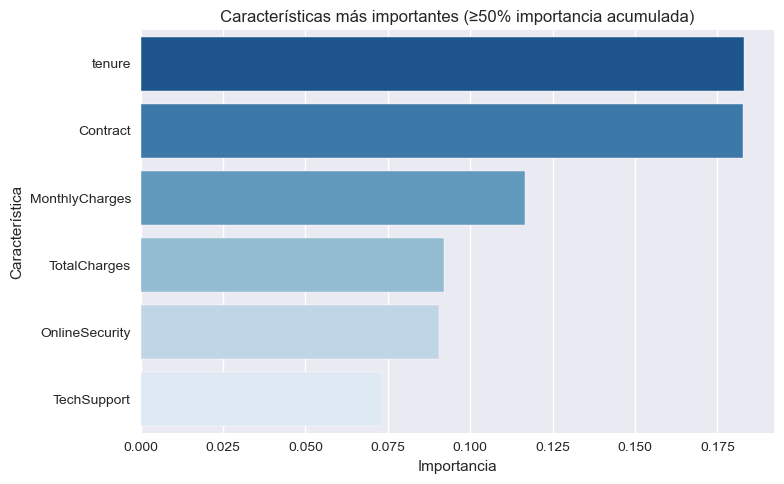

In [182]:
import seaborn as sns

import matplotlib.pyplot as plt

# Graficar las características seleccionadas (top 50% importancia acumulada)
plt.figure(figsize=(8, 5))
sns.barplot(
    x='importance',
    y='feature',
    data=feat_imp_df[feat_imp_df['feature'].isin(selected_features)],
    palette='Blues_r'
)
plt.title('Características más importantes (≥50% importancia acumulada)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [183]:
# Métricas
metrics_all = [
    accuracy_score(y_full_bin, y_pred_all),
    f1_score(y_full_bin, y_pred_all),
    roc_auc_score(y_full_bin, y_prob_all)
]
metrics_top = [
    accuracy_score(y_full_bin, y_pred_top),
    f1_score(y_full_bin, y_pred_top),
    roc_auc_score(y_full_bin, y_prob_top)
]

In [185]:
# Imprimir métricas
print("Métricas del modelo completo (todas las características):")
print(f"Accuracy: {metrics_all[0]:.4f}")
print(f"F1 Score: {metrics_all[1]:.4f}")
print(f"AUC: {metrics_all[2]:.4f}")

print("\nMétricas del modelo con top features (≥70% importancia acumulada):")
print(f"Accuracy: {metrics_top[0]:.4f}")
print(f"F1 Score: {metrics_top[1]:.4f}")
print(f"AUC: {metrics_top[2]:.4f}")

# Guardar resultados en un DataFrame
df_results = pd.DataFrame({
    'Métrica': ['Accuracy', 'F1 Score', 'AUC'],
    'Modelo completo': metrics_all,
    'Top features': metrics_top
})

# Guardar a CSV
df_results.to_csv('resultados_modelos_rf.csv', index=False)
print("\nResultados guardados en 'resultados_modelos_rf.csv'")

Métricas del modelo completo (todas las características):
Accuracy: 0.8542
F1 Score: 0.7673
AUC: 0.9382

Métricas del modelo con top features (≥70% importancia acumulada):
Accuracy: 0.8444
F1 Score: 0.7503
AUC: 0.9290

Resultados guardados en 'resultados_modelos_rf.csv'


In [189]:
# Imprimir resultados resumidos de métricas por modelo
print("Resultados de métricas por modelo:")
for nombre, métricas in resultados.items():
    print(f"\nModelo: {nombre}")
    print(f"  Accuracy : {métricas['Accuracy']:.4f}")
    print(f"  F1 Score : {métricas['F1 Score']:.4f}")
    print(f"  AUC      : {métricas['AUC']:.4f}")


Resultados de métricas por modelo:

Modelo: Completo
  Accuracy : 0.8542
  F1 Score : 0.7673
  AUC      : 0.9382

Modelo: Top features
  Accuracy : 0.8444
  F1 Score : 0.7503
  AUC      : 0.9290

Modelo: Logística
  Accuracy : 0.7372
  F1 Score : 0.6154
  AUC      : 0.8364

Modelo: Gradient Boosting
  Accuracy : 0.8680
  F1 Score : 0.7212
  AUC      : 0.9359
